## **Crash course worked examples:**

name - Amrutha sai Edara

NUID - 002776773

The main goal of this notebook, is to understand the concept of causal inference with one of the technique used to depict causalty i.e, Granger Causality test.

##**Example 1:**

 The dataset used below has valuable data for analyzing weather patterns, climate changes, and atmospheric conditions on a daily basis.

##**About the dataset:**

* Date: The date on which the weather measurements were taken.

* Average temperature (°F): The average temperature for the day in degrees Fahrenheit.

* Average humidity (%): The average relative humidity for the day, expressed as a percentage.

* Average dewpoint (°F): The average dewpoint temperature in degrees Fahrenheit. Dewpoint is the temperature at which air becomes saturated with moisture.

* Average barometer (in): The average atmospheric pressure for the day, measured in inches of mercury (inHg).

* Average windspeed (mph): The average speed of the wind in miles per hour.

* Average gustspeed (mph): The average speed of wind gusts in miles per hour.

* Average direction (°deg): The average wind direction in degrees from true north.

* Rainfall for month (in): Total rainfall recorded for the month up to that date, measured in inches.

* Rainfall for year (in): Total rainfall recorded for the year up to that date, measured in inches.

* Maximum rain per minute: The maximum rainfall rate recorded in a minute on that day, measured in inches.

* Maximum temperature (°F): The highest temperature recorded on that day in degrees Fahrenheit.

* Minimum temperature (°F): The lowest temperature recorded on that day in degrees Fahrenheit.

* Maximum humidity (%): The highest relative humidity percentage recorded on that day.

* Minimum humidity (%): The lowest relative humidity percentage recorded on that day.

* Maximum pressure: The highest atmospheric pressure recorded on that day, in inches of mercury.

* Minimum pressure: The lowest atmospheric pressure recorded on that day, in inches of mercury.

* Maximum windspeed (mph): The highest wind speed recorded on that day in miles per hour.

* Maximum gust speed (mph): The highest gust speed recorded on that day in miles per hour.

* Maximum heat index (°F): The highest heat index recorded on that day in degrees Fahrenheit. The heat index is a measure of how hot it feels when humidity is factored with the actual air temperature.

* Date1: Seems to be a duplicate of the 'Date' column, likely in a different format.

* Month: The month extracted from the date.

* diff_pressure: Appears to represent the difference between the maximum and minimum atmospheric pressure recorded on that day

####Importing all the required packages and models for analysis

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Plotting
%matplotlib inline

plt.rcParams['figure.figsize'] = (15,10) #Set the default figure size
plt.style.use('ggplot') #Set the plotting method

from statsmodels.tsa.stattools import grangercausalitytests #Causality Testing
from statsmodels.tsa.seasonal import seasonal_decompose #Seasonal Decomposition
from statsmodels.tsa.stattools import adfuller #Stationary Testing
from statsmodels.graphics.tsaplots import plot_acf #Compute lag for ARIMA
from statsmodels.graphics.tsaplots import plot_pacf #Compute partial lag for ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX #Build the model

from sklearn.metrics import mean_absolute_error

####Loading the dataset

In [ ]:
weather = pd.read_csv("https://raw.githubusercontent.com/Amrutha1103/causality/main/climate_data.csv") #Read the weather CSV
weather.head() #Take a peek at the dataset

Date  Average temperature (°F)  Average humidity (%)  \
0  2009-01-01                      37.8                  35.0   
1  2009-01-02                      43.2                  32.0   
2  2009-01-03                      25.7                  60.0   
3  2009-01-04                       9.3                  67.0   
4  2009-01-05                      23.5                  30.0   

   Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
0                   12.7                    29.7                     26.4   
1                   14.7                    29.5                     12.8   
2                   12.7                    29.7                      8.3   
3                    0.1                    30.4                      2.9   
4                   -5.3                    29.9                     16.7   

   Average gustspeed (mph)  Average direction (°deg)  Rainfall for month (in)  \
0                     36.8                     274.0                      0.0   
1                     18.0                     240.0                      0.0   
2                     12.2                     290.0                      0.0   
3                      4.5                      47.0                      0.0   
4                     23.1                     265.0                      0.0   

   Rainfall for year (in)  ...  Maximum humidity (%)  Minimum humidity (%)  \
0                     0.0  ...                   4.0                  27.0   
1                     0.0  ...                   4.0                  16.0   
2                     0.0  ...                   8.0                  35.0   
3                     0.0  ...                   7.0                  35.0   
4                     0.0  ...                   5.0                  13.0   

   Maximum pressure  Minimum pressure  Maximum windspeed (mph)  \
0            29.762            29.596                     41.4   
1            29.669            29.268                     35.7   
2            30.232            29.260                     25.3   
3            30.566            30.227                     12.7   
4            30.233            29.568                     38.0   

   Maximum gust speed (mph)  Maximum heat index (°F)       Date1  Month  \
0                      59.0                     40.0  2009-01-01      1   
1                      51.0                     52.0  2009-01-02      1   
2                      38.0                     41.0  2009-01-03      1   
3                      20.0                     32.0  2009-01-04      1   
4                      53.0                     32.0  2009-01-05      1   

   diff_pressure  
0          0.166  
1          0.401  
2          0.972  
3          0.339  
4          0.665  

[5 rows x 23 columns]

####Check for null values in the dataset

In [ ]:
#Check for Null values
print(weather.isnull().any()) #Check for nulls

Date                        False
Average temperature (°F)    False
Average humidity (%)        False
Average dewpoint (°F)       False
Average barometer (in)      False
Average windspeed (mph)     False
Average gustspeed (mph)     False
Average direction (°deg)    False
Rainfall for month (in)     False
Rainfall for year (in)      False
Maximum rain per minute     False
Maximum temperature (°F)    False
Minimum temperature (°F)    False
Maximum humidity (%)        False
Minimum humidity (%)        False
Maximum pressure            False
Minimum pressure            False
Maximum windspeed (mph)     False
Maximum gust speed (mph)    False
Maximum heat index (°F)     False
Date1                       False
Month                       False
diff_pressure               False
dtype: bool


There are no null values, but there seems to be some columns that I find unnecessary for what I would like to do. Columns like month does not seem necessary. I also should check if the date fields are the same.

####Below line of code checks if the date format for the columns "Date" and "Date1" are similar or not.

In [ ]:
print(weather.loc[weather["Date"] != weather["Date1"]]) #Check if the date fields are the same

Empty DataFrame
Columns: [Date, Average temperature (°F), Average humidity (%), Average dewpoint (°F), Average barometer (in), Average windspeed (mph), Average gustspeed (mph), Average direction (°deg), Rainfall for month (in), Rainfall for year (in), Maximum rain per minute, Maximum temperature (°F), Minimum temperature (°F), Maximum humidity (%), Minimum humidity (%), Maximum pressure, Minimum pressure, Maximum windspeed (mph), Maximum gust speed (mph), Maximum heat index (°F), Date1, Month, diff_pressure]
Index: []

[0 rows x 23 columns]


The date fields are the exact same, so Date1 should be removed.

Looking at the columns, I think I should also remove most of the min and max fields, as I want to look at the average (with exception to temperature, as I am interested in how that one specifically changes). Wind direction also appears to be something that does not change anything, as a gust of wind is a gust of wind from any direction.

I should also not use rainfall as it is here, as it builds until the end of the month/year to get the rain value. I am looking at this in a daily context, so if I want to use rainfall, I should get the difference per day in order to get the rainfall per day. That is not inherently useful either, so I will just drop it.

In [ ]:
#Dropping the columns I had justified dropping
weatherClean = weather.drop(["Average gustspeed (mph)", "Average direction (°deg)", "Rainfall for month (in)", "Rainfall for year (in)",
                        "Maximum rain per minute", "Maximum humidity (%)", "Minimum humidity (%)", "Maximum pressure",
                        "Minimum pressure", "Maximum windspeed (mph)", "Maximum gust speed (mph)", "Maximum heat index (°F)",
                        "Date1", "Month", "diff_pressure"], axis = 1)
weatherClean.head() #Take a peek at the dataset

Date  Average temperature (°F)  Average humidity (%)  \
0  2009-01-01                      37.8                  35.0   
1  2009-01-02                      43.2                  32.0   
2  2009-01-03                      25.7                  60.0   
3  2009-01-04                       9.3                  67.0   
4  2009-01-05                      23.5                  30.0   

   Average dewpoint (°F)  Average barometer (in)  Average windspeed (mph)  \
0                   12.7                    29.7                     26.4   
1                   14.7                    29.5                     12.8   
2                   12.7                    29.7                      8.3   
3                    0.1                    30.4                      2.9   
4                   -5.3                    29.9                     16.7   

   Maximum temperature (°F)  Minimum temperature (°F)  
0                      40.0                      34.0  
1                      52.0                      37.0  
2                      41.0                       6.0  
3                      19.0                      -0.0  
4                      30.0                      15.0

##Fixing the labels

For this, I will have all the average as just the field name. For example, Average Temperature (°F) would become Temperature. The min and max temp will become minTemperature and maxTemperature respectively

In [ ]:
currentLabels = list(weatherClean.columns) #A list of the current columns

#The list of new column names I want
newLabels = ["Temperature", "Humidity", "Dewpoint", "Pressure", "Windspeed", "MaxTemperature", "MinTemperature"]
numLabels = len(newLabels) #Get the length for the for loop

#For loop to change the column names
for i in range(0, numLabels):
    #Set the column names to the new columns, ignoring the Date name (that name is fine)
    weatherClean = weatherClean.rename(columns = {currentLabels[i + 1] : newLabels[i]})

weatherClean.head() #Take a peek at the dataset

Date  Temperature  Humidity  Dewpoint  Pressure  Windspeed  \
0  2009-01-01         37.8      35.0      12.7      29.7       26.4   
1  2009-01-02         43.2      32.0      14.7      29.5       12.8   
2  2009-01-03         25.7      60.0      12.7      29.7        8.3   
3  2009-01-04          9.3      67.0       0.1      30.4        2.9   
4  2009-01-05         23.5      30.0      -5.3      29.9       16.7   

   MaxTemperature  MinTemperature  
0            40.0            34.0  
1            52.0            37.0  
2            41.0             6.0  
3            19.0            -0.0  
4            30.0            15.0

In [ ]:
print(weatherClean.dtypes)

Date               object
Temperature       float64
Humidity          float64
Dewpoint          float64
Pressure          float64
Windspeed         float64
MaxTemperature    float64
MinTemperature    float64
dtype: object


In [ ]:
#set dates to the index
weatherClean["Date"] = pd.to_datetime(weatherClean["Date"]) #Ensure the date data is in datetime format
weatherClean.set_index("Date", inplace = True) #Set the date to the index
weatherClean = weatherClean.asfreq("D") #Set the frequency to daily

weatherClean.head(12) #Take a peek at the data

Temperature  Humidity  Dewpoint  Pressure  Windspeed  \
Date                                                               
2009-01-01         37.8      35.0      12.7      29.7       26.4   
2009-01-02         43.2      32.0      14.7      29.5       12.8   
2009-01-03         25.7      60.0      12.7      29.7        8.3   
2009-01-04          9.3      67.0       0.1      30.4        2.9   
2009-01-05         23.5      30.0      -5.3      29.9       16.7   
2009-01-06         24.8      42.0       4.6      29.8       16.0   
2009-01-07         34.2      60.0      21.6      29.7       20.4   
2009-01-08         42.1      41.0      20.0      29.8       17.5   
2009-01-09         30.3      46.0      11.4      30.0        6.9   
2009-01-10         26.2      38.0       3.6      30.4       18.2   
2009-01-11         30.1      41.0       9.0      30.3       17.0   
2009-01-12         23.4      60.0      11.0      30.3        7.4   

            MaxTemperature  MinTemperature  
Date                                        
2009-01-01            40.0            34.0  
2009-01-02            52.0            37.0  
2009-01-03            41.0             6.0  
2009-01-04            19.0            -0.0  
2009-01-05            30.0            15.0  
2009-01-06            29.0            19.0  
2009-01-07            39.0            27.0  
2009-01-08            51.0            36.0  
2009-01-09            41.0            19.0  
2009-01-10            31.0            22.0  
2009-01-11            36.0            26.0  
2009-01-12            31.0            16.0

In [ ]:
pd.set_option('display.max_rows', 400) #Set the display to allow all the null rows to show
print(weatherClean.isnull().any()) #Check for nulls
print(weatherClean.loc[weatherClean["Temperature"].isnull()]) #Print all the null rows

Temperature       True
Humidity          True
Dewpoint          True
Pressure          True
Windspeed         True
MaxTemperature    True
MinTemperature    True
dtype: bool
            Temperature  Humidity  Dewpoint  Pressure  Windspeed  \
Date                                                               
2009-03-13          NaN       NaN       NaN       NaN        NaN   
2009-03-14          NaN       NaN       NaN       NaN        NaN   
2009-03-15          NaN       NaN       NaN       NaN        NaN   
2009-12-01          NaN       NaN       NaN       NaN        NaN   
2009-12-02          NaN       NaN       NaN       NaN        NaN   
2009-12-03          NaN       NaN       NaN       NaN        NaN   
2009-12-04          NaN       NaN       NaN       NaN        NaN   
2009-12-05          NaN       NaN       NaN       NaN        NaN   
2009-12-06          NaN       NaN       NaN       NaN        NaN   
2009-12-07          NaN       NaN       NaN       NaN        NaN   
2009-12-08 

Observation: From the above line of code it is clear that there are quite a few null values throughtout the dataset.

Problem: there are quite a few null values throughout this dataset. This includes the entire month of December, 2009 and large chunks of other months. I looked through the dataset as well as the dataset's author's source. The source was also missing these dates, including December 2009. This a huge note in the process, as I have to either drop the nulls and have Pandas with no frequency or fill these null values and eliminate the context of those months. I am going to continue ahead with this dataset, though, using frontfill to propegate. This will likely cause noticable lines of the same value in the data. Just a warning.

In [ ]:
pd.set_option('display.max_rows', 15) #Set the max rows back to normal
weatherClean = weatherClean.fillna(method  = "ffill") #Fill the null values
print(weatherClean.isnull().any()) #Check for nulls
print(weatherClean.index) #Print the index to see the frequency
print(weatherClean.head()) #Print the head of the dataset

Temperature       False
Humidity          False
Dewpoint          False
Pressure          False
Windspeed         False
MaxTemperature    False
MinTemperature    False
dtype: bool
DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28'],
              dtype='datetime64[ns]', name='Date', length=4227, freq='D')
            Temperature  Humidity  Dewpoint  Pressure  Windspeed  \
Date                                                               
2009-01-01         37.8      35.0      12.7      29.7       26.4   
2009-01-02         43.2      32.0      14.7      29.5       12.8   
2009-01-03         25.7      60.0      12.7      29.7        8.3   
2009-01-04      

[Text(0, 0.5, 'Temperature (F)')]

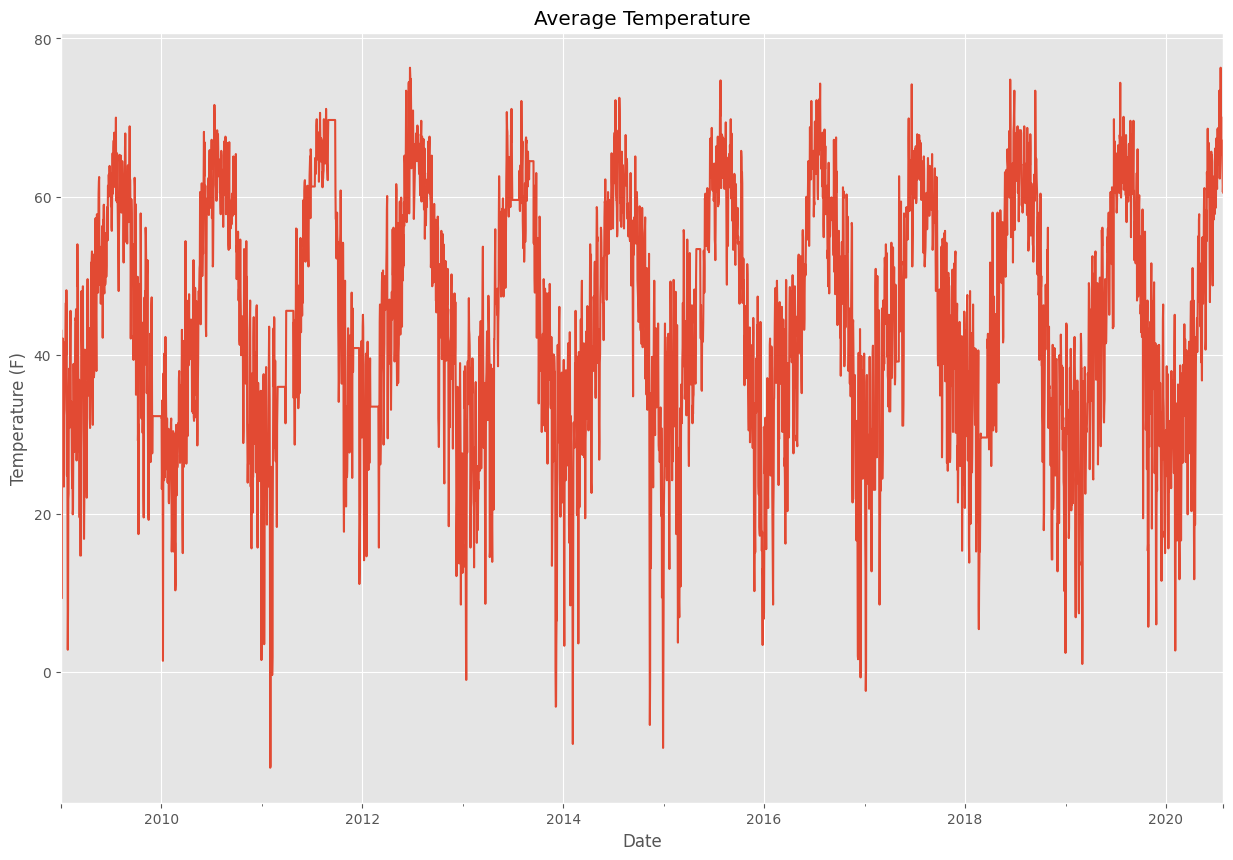

In [ ]:
weatherGraph = weatherClean["Temperature"].plot(title = "Average Temperature") #Plot the temperature data
weatherGraph.set(ylabel = "Temperature (F)") #Put the temperature label

The filled values do not appear to be too noticable on the graph. I do not think it will cause too many issues.

###Visualizations


####Plotting for all the variables in the dataset

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

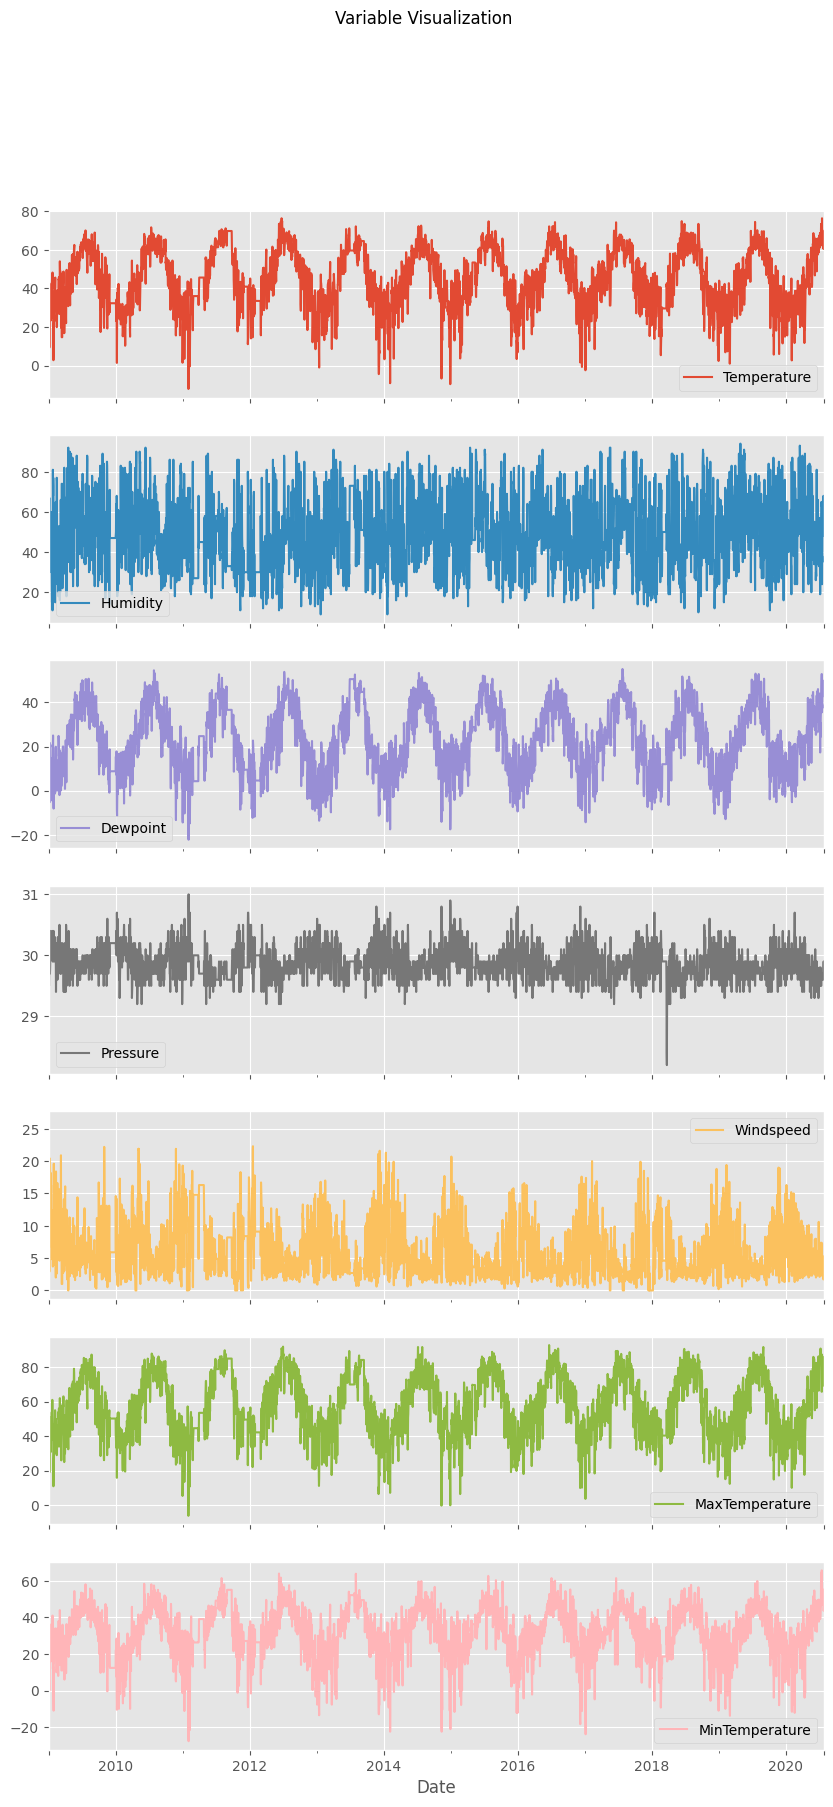

In [ ]:
plt.rcParams['figure.figsize'] = (10,20) #Set the figure size
weatherClean.plot(subplots = True, title = "Variable Visualization") #Plot all the variables

[Text(0, 0.5, 'Temperature (F)')]

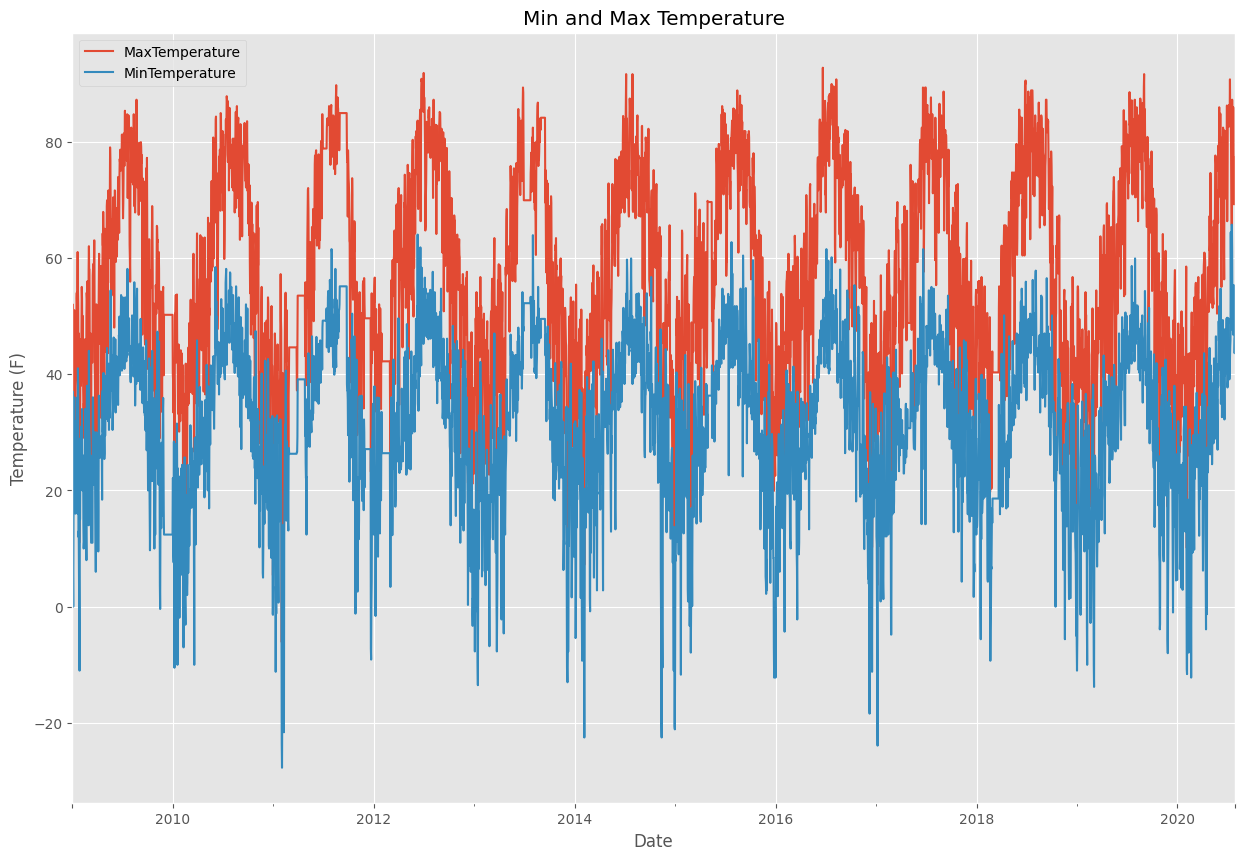

In [ ]:
plt.rcParams['figure.figsize'] = (15,10) #Set the figure size for the min-max temperature graph
minmax = weatherClean[["MaxTemperature", "MinTemperature"]].plot(title = "Min and Max Temperature") #Plot the min and max temperatures
minmax.set(ylabel = "Temperature (F)") #Put the temperature label

The majority of these features have clear seasonality to them. The general trends still seem to be upheld despite the missing data issues, but the min max graph shows how some larger areas that had gaps in their data,specifically March-April of 2011.

###Causality

####Test for causality

In [ ]:
columns = weatherClean.columns #Get the columns to use as both rows and columns
maxlag = 12 #The largest amount of lag allowable
test = "ssr_chi2test" #Making sure we are looking at the chi squarred test

cause = pd.DataFrame(np.zeros((len(columns), len(columns))), columns = columns, index = columns) #Build the layout for the causality

#For loop to fill the columns of the causality
for column in columns:

    #For loop to fill the rows of the causality, in conjunction with the column
    for row in columns:
        causality = grangercausalitytests(weatherClean[[row, column]], maxlag = maxlag,verbose = False) #Calculate causality values
        pValues = [round(causality[i+1][0][test][1],5) for i in range(maxlag)] #Collect all the p values in the max lag
        minValue = np.min(pValues) #Take the smallest P value
        cause.loc[row, column] = minValue #Put the smallest P value into the causalty

cause.head(7) #Show the causality

Temperature  Humidity  Dewpoint  Pressure  Windspeed  \
Temperature             1.0       0.0       0.0       0.0    0.00000   
Humidity                0.0       1.0       0.0       0.0    0.00121   
Dewpoint                0.0       0.0       1.0       0.0    0.00000   
Pressure                0.0       0.0       0.0       1.0    0.00000   
Windspeed               0.0       0.0       0.0       0.0    1.00000   
MaxTemperature          0.0       0.0       0.0       0.0    0.00000   
MinTemperature          0.0       0.0       0.0       0.0    0.00000   

                MaxTemperature  MinTemperature  
Temperature                0.0             0.0  
Humidity                   0.0             0.0  
Dewpoint                   0.0             0.0  
Pressure                   0.0             0.0  
Windspeed                  0.0             0.0  
MaxTemperature             1.0             0.0  
MinTemperature             0.0             1.0

There is very little connection between these variables. That means VAR is not useful here. I am also not looking for one variable specifically, so a regular regression does not fit here. Thus, I will use ARIMA.

###Seasonal Decomposition


In context of causal analysis and time series analysis, is a statistical method used to decompose a time series into several component, typically including:

* **Trend:** This component reflects the long-term progression of the series, showing how the data evolves over time, independent of cyclical or seasonal variations.

* **Seasonality:** This represents the seasonal fluctuations in the time series data. For example, in a dataset of monthly sales, there might be a regular pattern that repeats every year, like increased sales in December due to the holiday season.

* **Residual:** This is the error component, consisting of what remains in the time series after the trend and seasonal components have been removed. It represents the irregular or stochastic part of the series, which can be thought of as noise.

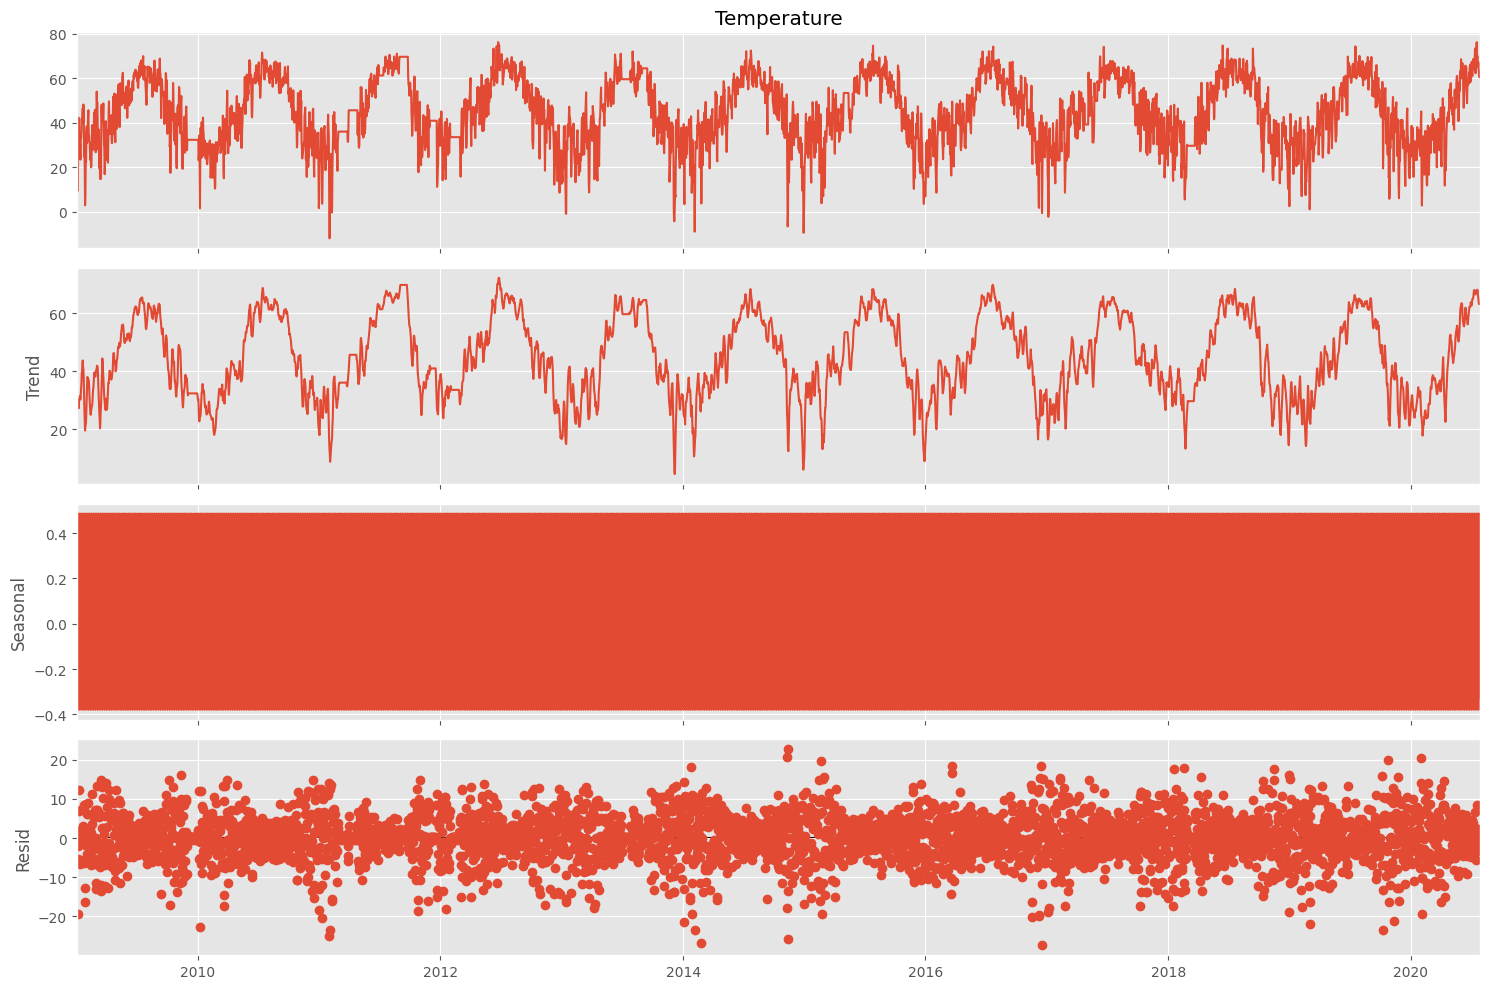

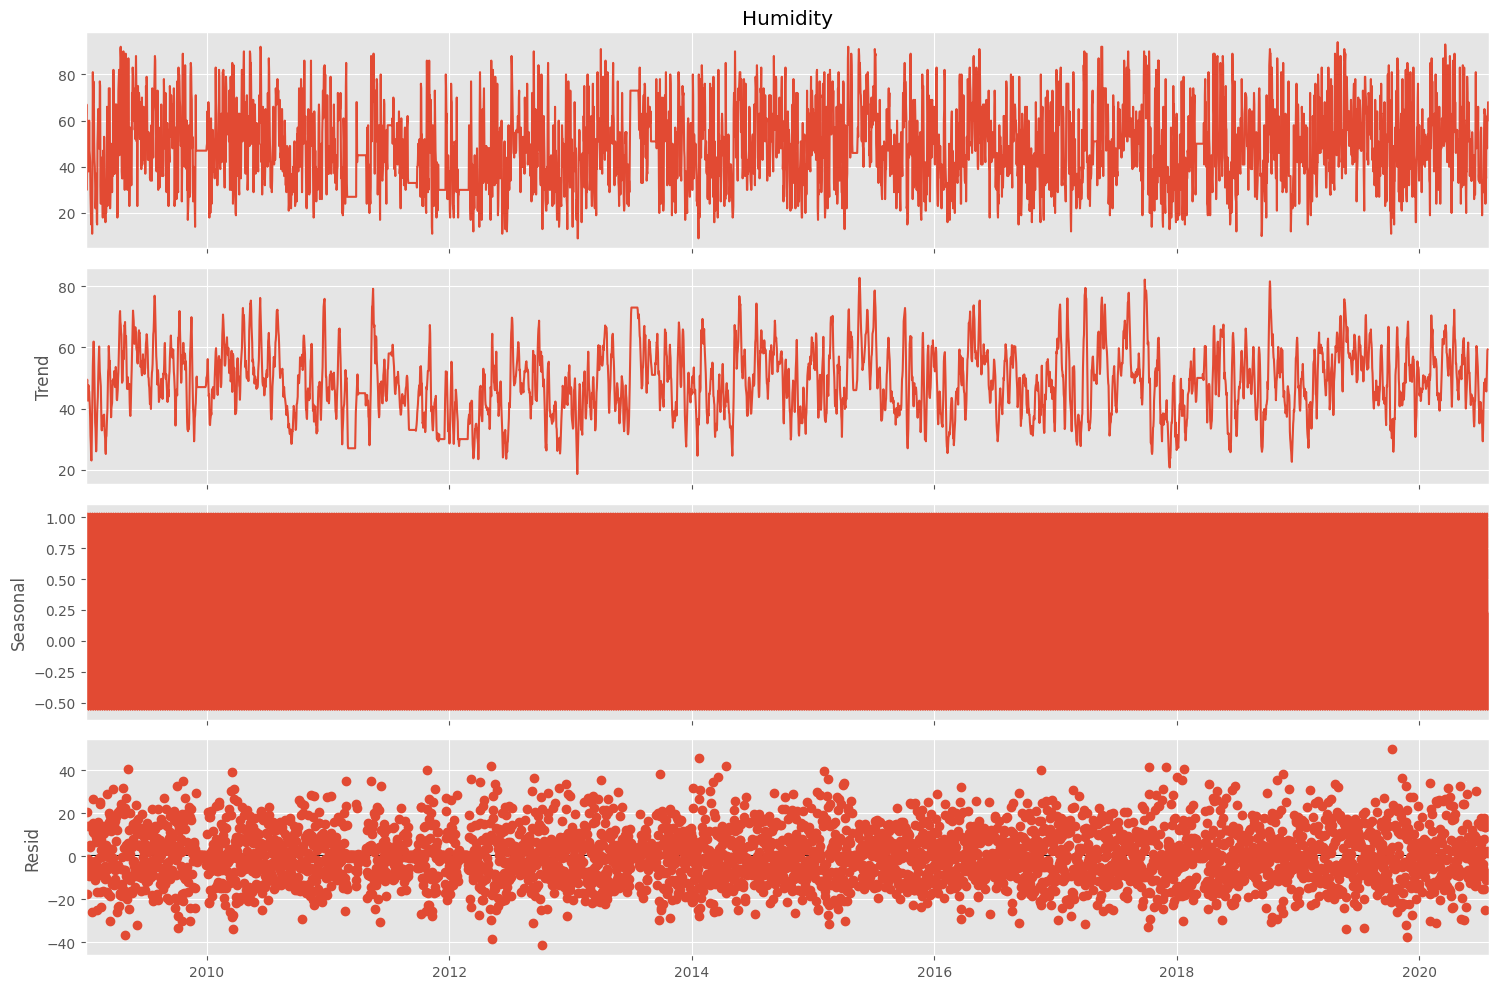

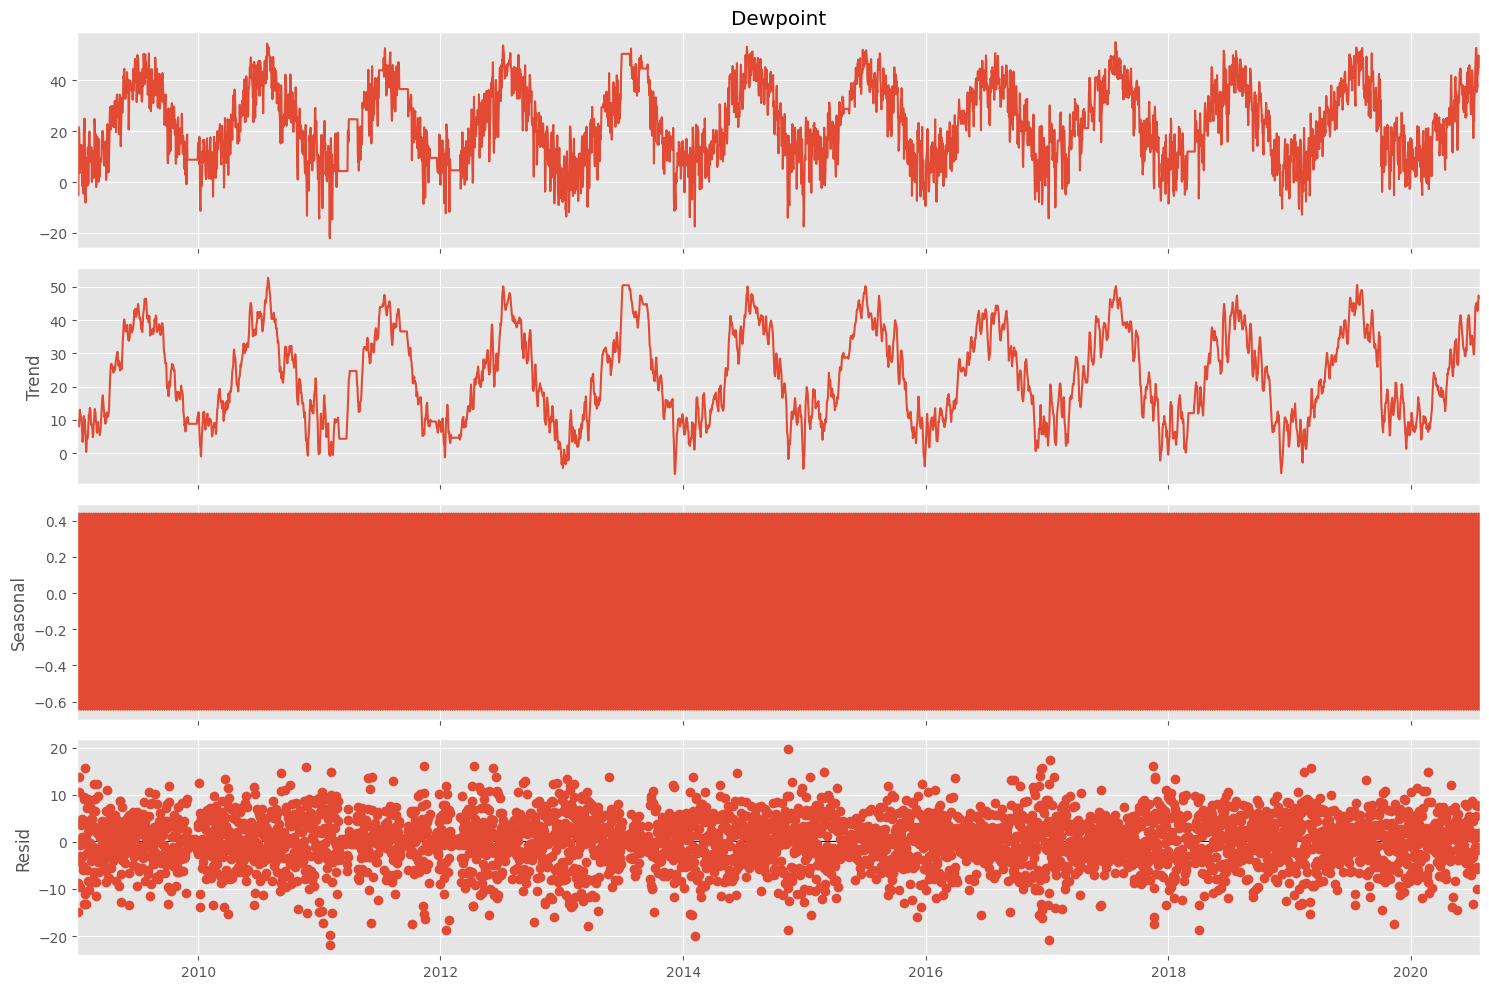

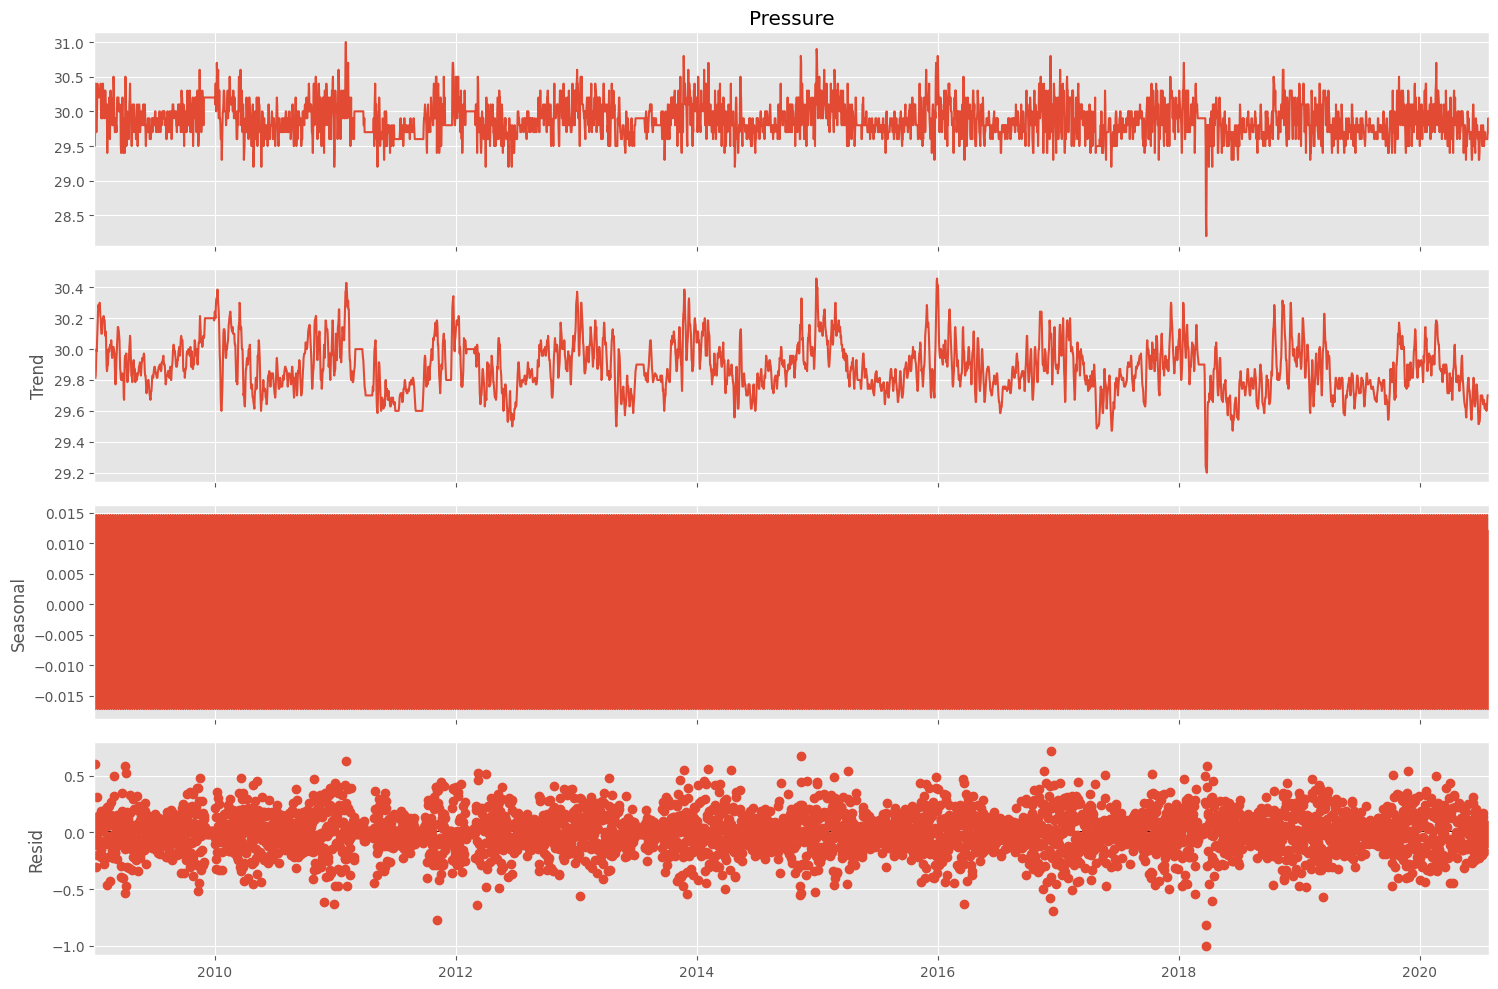

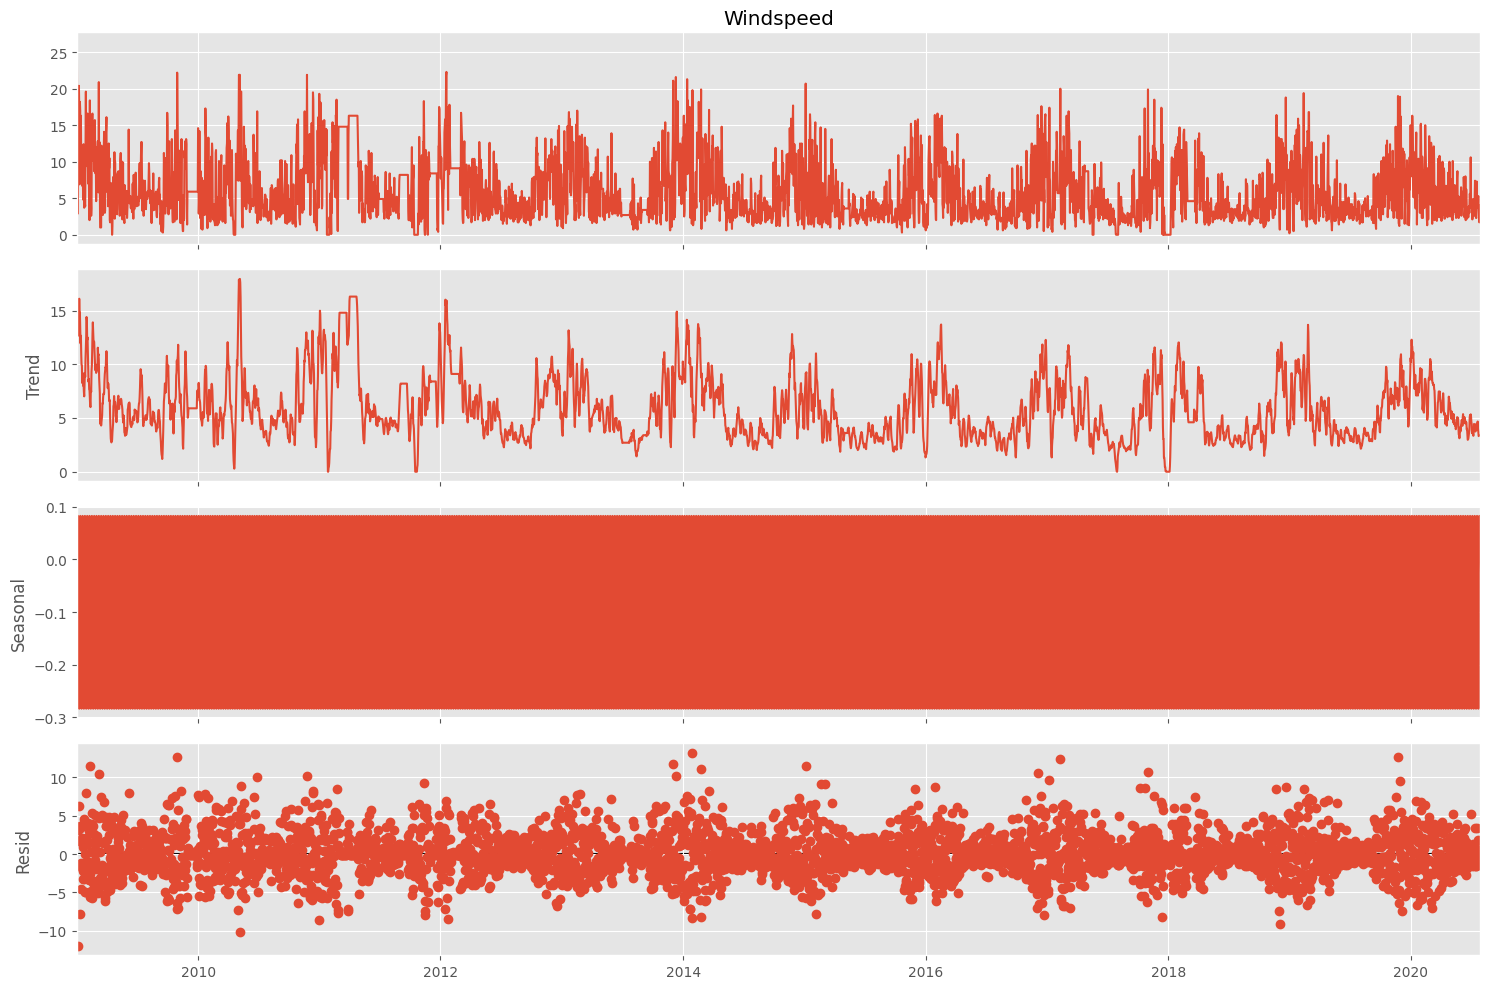

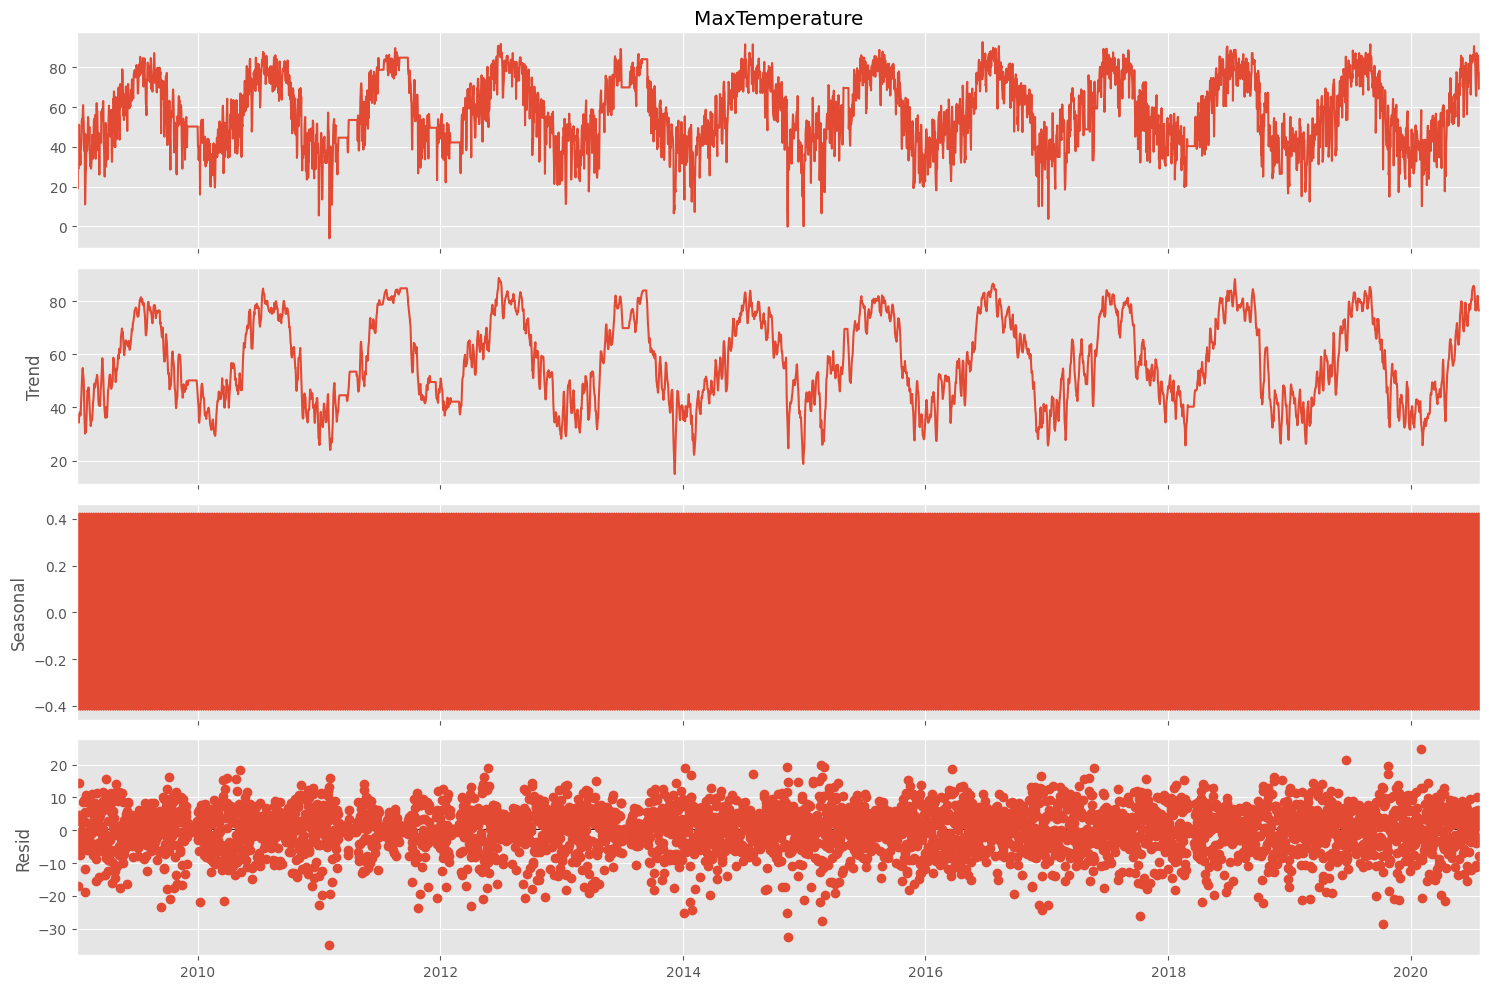

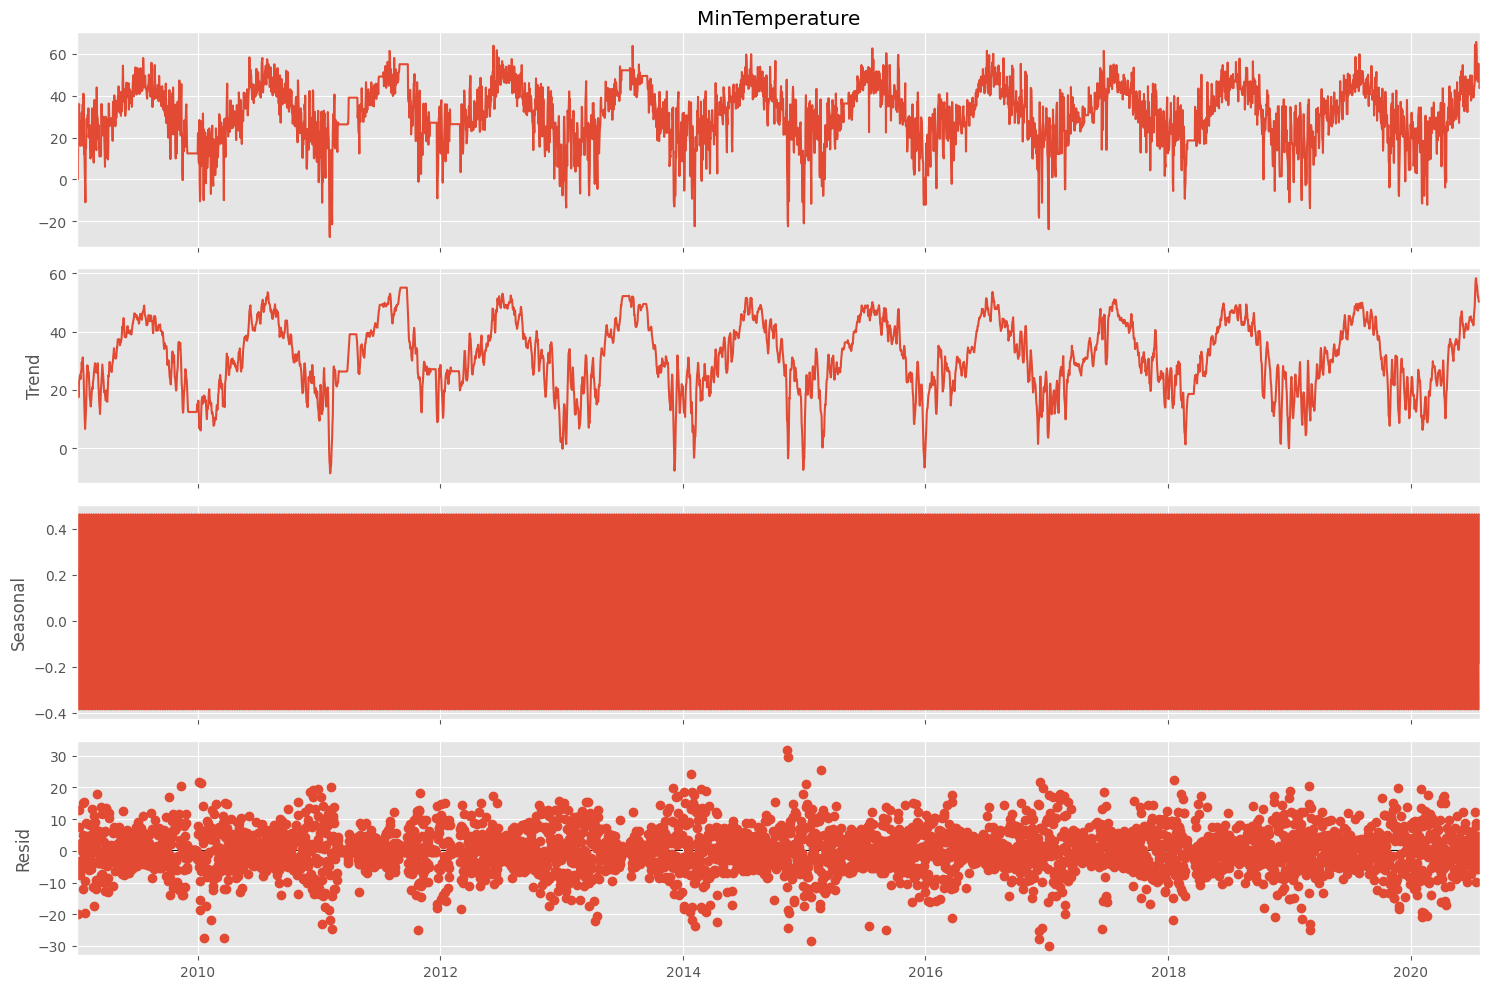

In [ ]:
#For each column, decompose and plot the column
for column in columns:
    decomposed = seasonal_decompose(weatherClean[column]) #Seasonally decompose the set column
    x = decomposed.plot() #Plot the decomposed column

###ADFuller Stationary Testing

**Augmented Dickey-Fuller (ADF) test**, often used in causal analysis and time series analysis, is a statistical test for stationarity.

**Stationarity** refers to the property of a time series to have statistical properties such as mean, variance, and autocorrelation that are constant over time. In simpler terms, a stationary time series has a consistent structure over time, making it predictable and analyzable using statistical models.

The ADF test specifically tests for a unit root in a time series, which is a characteristic of non-stationary data. A unit root indicates that the time series is a random walk or has some structure that varies over time.

* The ADF test procedure includes, **modeling the Time Series:** The test models the time series using an autoregressive model, which is a type of regression where the variable of interest is regressed on its own lagged (past) values

In [ ]:
print("ADFuller Test; Significance: 0.05") #Print the significance level

#Do the ADFuller test for each column
for column in columns:
    adf = adfuller(weatherClean[column]) #Call adfuller to test
    print("ADF test static for {} is {}".format(column, adf[1])) #Print the adfuller results

ADFuller Test; Significance: 0.05
ADF test static for Temperature is 0.00011995140074475298
ADF test static for Humidity is 4.374729077860643e-26
ADF test static for Dewpoint is 0.0021772381071362306
ADF test static for Pressure is 2.409671769464431e-07
ADF test static for Windspeed is 6.909924882775198e-17
ADF test static for MaxTemperature is 0.000614417124358535
ADF test static for MinTemperature is 6.684019972542087e-06


Every column tested below the significance level. The data is stationary.

###Training the Model (Dewpoint)
####Validation



In [ ]:
length = int((len(weatherClean)*9)/10) #Get 9/10 of the length of the data
print(length) #Print the length to make sure it actually is an int
train = weatherClean[:length] #Split off the training set
test = weatherClean[length:] #Split off the testing set
dew = test["Dewpoint"] #Get the dewpoint data for the testing set
test = test.drop(columns = {"Dewpoint"}) #Drop the dewpoint so the model will not get mad

3804


#####In the below analysis, we have used SARIMAX model, which is a Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, is an updated version of the **ARIMA model**.

In [ ]:
model = SARIMAX(train["Dewpoint"], train.drop(columns = {"Dewpoint"})) #Build the SARIMAX model
fitModel = model.fit(disp = 1) #Fit the SARIMAx model

Text(0, 0.5, 'Temperature (F)')

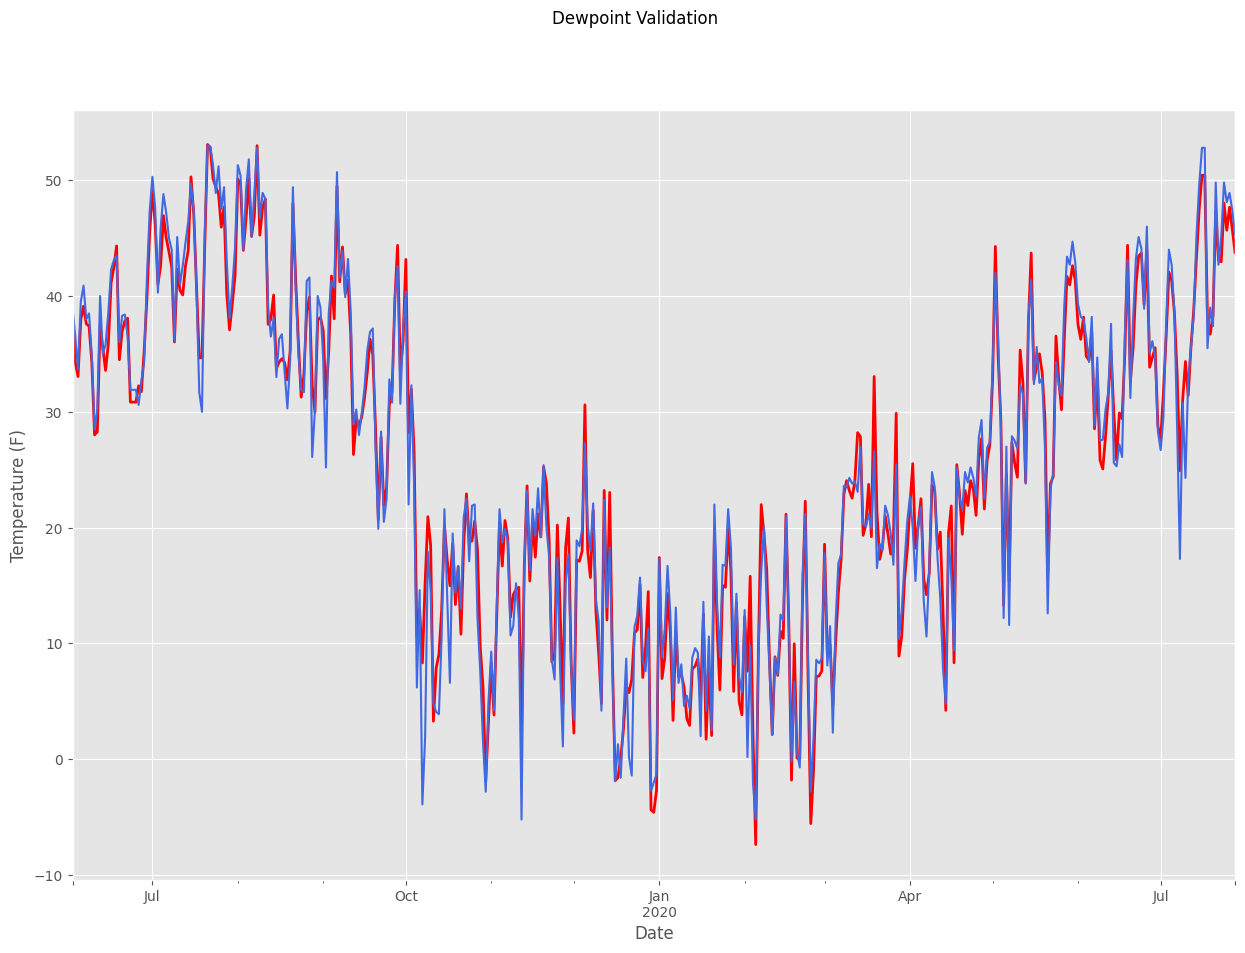

In [ ]:
forecast = fitModel.forecast(len(weatherClean) - length, exog = test.values) #Forecast for validation data
ax = forecast.plot(subplots = True, color = "red", linewidth = 2, title = "Dewpoint Validation") #Plot the forecasted data
dew.plot(ax = ax, subplots = True, color = "royalblue") #Plot the actual dewpoint
plt.ylabel("Temperature (F)") #Put the temperature label

In [ ]:
print("The Absolute Error of {} is {}".format("Dewpoint", mean_absolute_error(dew, forecast))) #Print the error

The Absolute Error of Dewpoint is 1.8177865625205534


The model is predicting with a small amount of error. This is fine

In [ ]:
modelPred = SARIMAX(weatherClean["Dewpoint"], weatherClean.drop(columns = {"Dewpoint"})) #Build the prediction model
fitModelPred = modelPred.fit(disp = 1) #Fit the SARIMAX model

In [ ]:
weatherNoDew = weatherClean.drop(columns = {"Dewpoint"}) #Get the weather data without the dewpoint
weatherNoDew = weatherNoDew[len(weatherClean) - 365:] #Limit the size so I can see it better in the graph
dewShort = dew[len(dew)-365:] #Get a shortened dew dataframe so details can be visible

Text(0, 0.5, 'Temperature (F)')

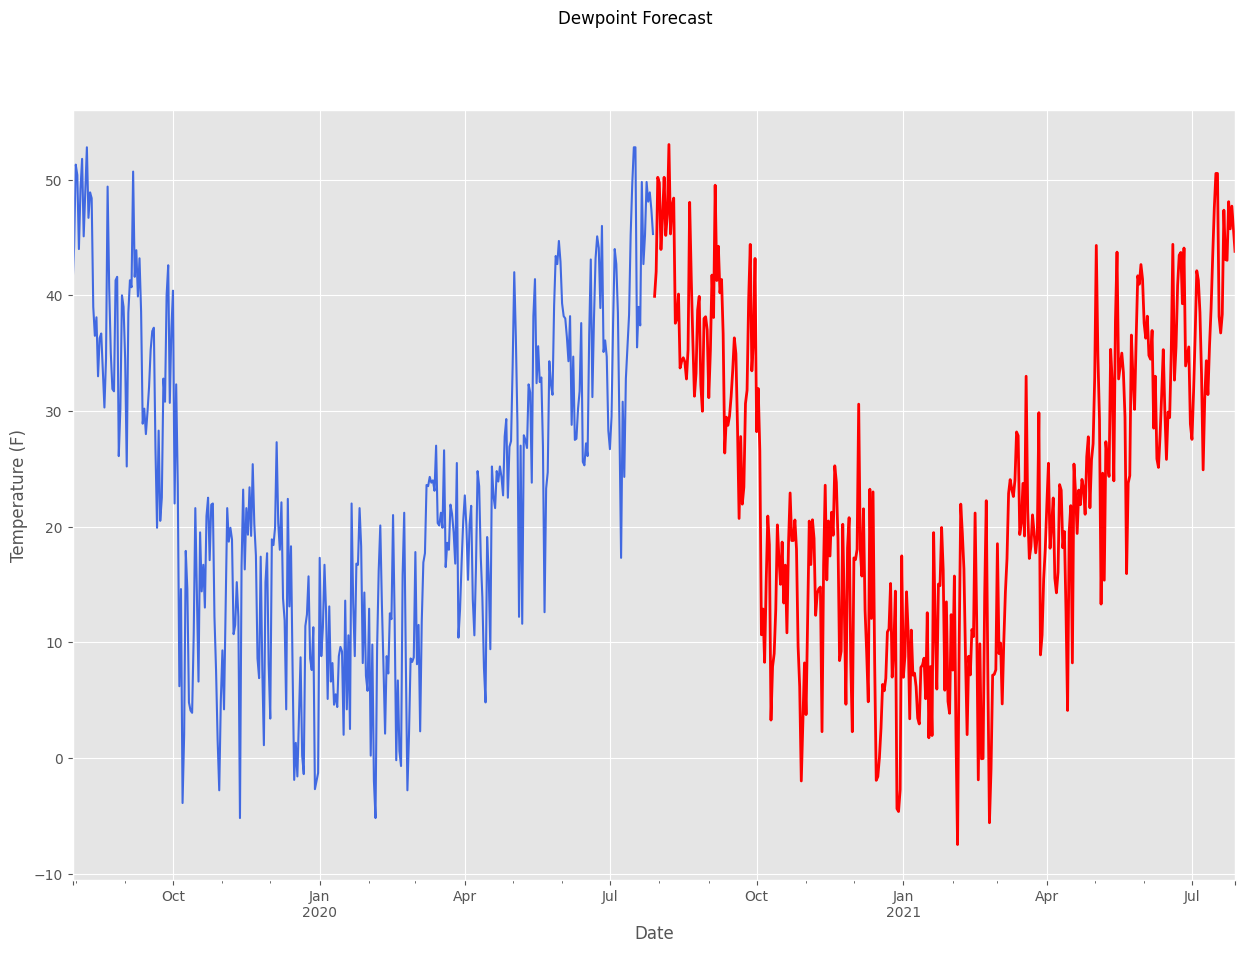

In [ ]:
forecastDew = fitModelPred.forecast(steps = len(weatherNoDew), exog = weatherNoDew.values) #Forecast the next year
ax = forecastDew.plot(subplots = True, color = "red", linewidth = 2, title = "Dewpoint Forecast") #Plot the dew forecast
dewShort.plot(ax = ax, subplots = True, color = "royalblue") #Plot the shortened dew dataframe
plt.ylabel("Temperature (F)") #Put the temperature label

In [ ]:
print("Actual (Taken from the source): 5.7") #Print yesterday's the dewpoint from the source
print("Prediction: {}".format(forecastDew["2020-11-13"])) #Print the prediction for yesterday

Actual (Taken from the source): 5.7
Prediction: 23.578964926784607


The prediction for yesterday was off, but previous years had higher dewpoints for this day. It is off in the actual, but it a fair prediction based off other years.

###Training the Model (Temperature)

####Validation

In [ ]:
trainTem = weatherClean[:length] #Get a training split
testTem = weatherClean[length:] #Get a testing split
temp = testTem["Temperature"] #Get the temperature data for graphing
testTem = testTem.drop(columns = {"Temperature"}) #Drop the temperature data to test the model

In [ ]:
modelTemp = SARIMAX(trainTem["Temperature"], trainTem.drop(columns = {"Temperature"})) #Build the model
fitModelTemp = modelTemp.fit(disp = 1) #Fit the SARIMAX model

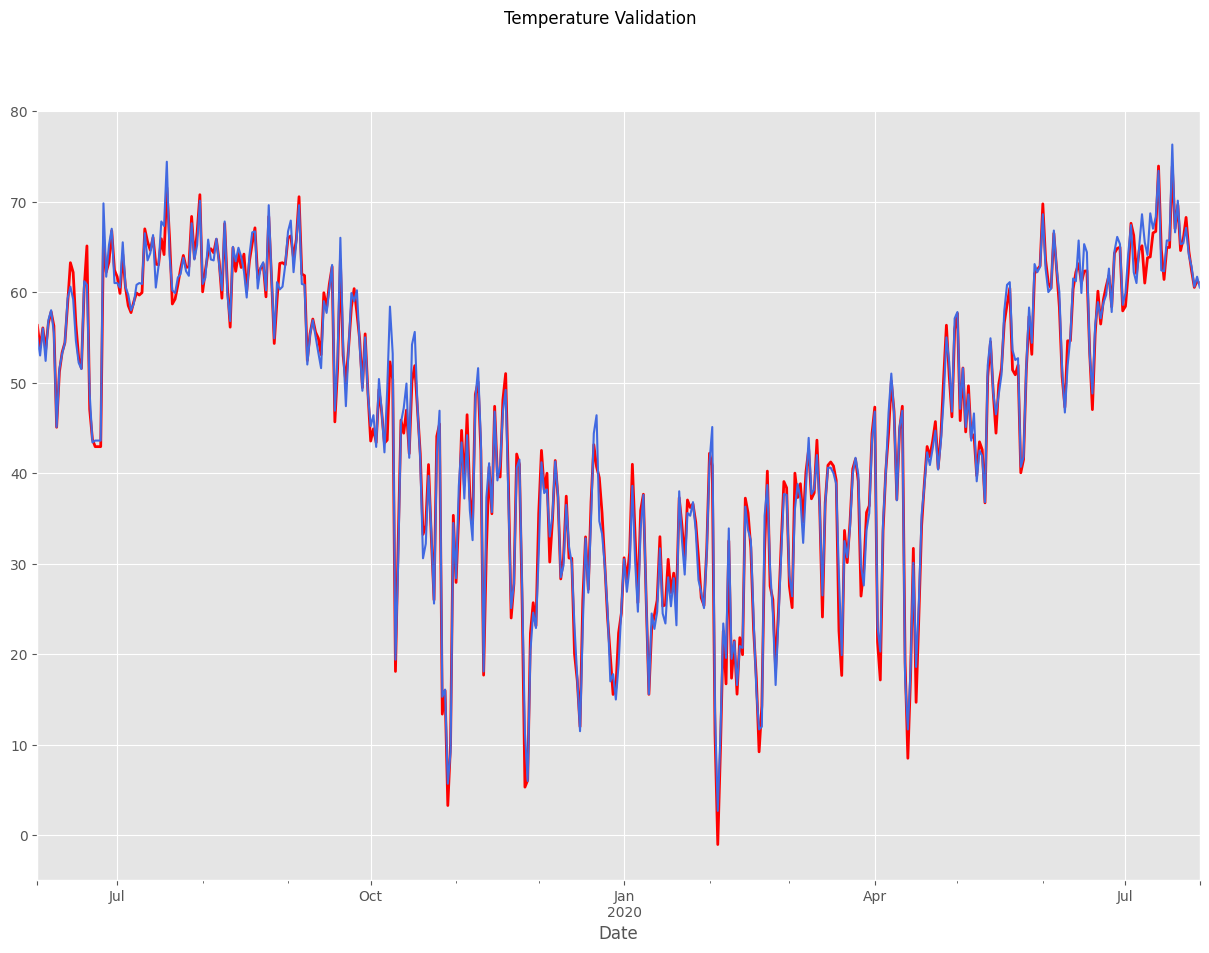

In [ ]:
forecastTem = fitModelTemp.forecast(len(weatherClean) - length, exog = testTem.values) #Get the validation forecast
ax = forecastTem.plot(subplots = True, color = "red", linewidth = 2, title = "Temperature Validation") #Plot the validation data
temp.plot(ax = ax, subplots = True, color = "royalblue") #Plot the temperature for the test timeframe
plt.ylab = "Temperature (F)" #Put the temperature label

In [ ]:
print("The Absolute Error of {} is {}".format("Temperature", mean_absolute_error(temp, forecastTem))) #Get the temperature error

The Absolute Error of Temperature is 1.249205662142648


In [ ]:
modelPredTemp = SARIMAX(weatherClean["Temperature"], weatherClean.drop(columns = {"Temperature"})) #Build the full temp model
fitModelPredTemp = modelPredTemp.fit(disp = 1) #Fit the SARIMAX model

In [ ]:
weatherNoTemp = weatherClean.drop(columns = {"Temperature"}) #Drop the temperature column so the model does not get mad
weatherNoTemp = weatherNoTemp[len(weatherClean) - 365:] #Split a small section for the model
tempShort = temp[len(dew)-365:] #Get a shortened section for graphing

Text(0, 0.5, 'Temperature (F)')

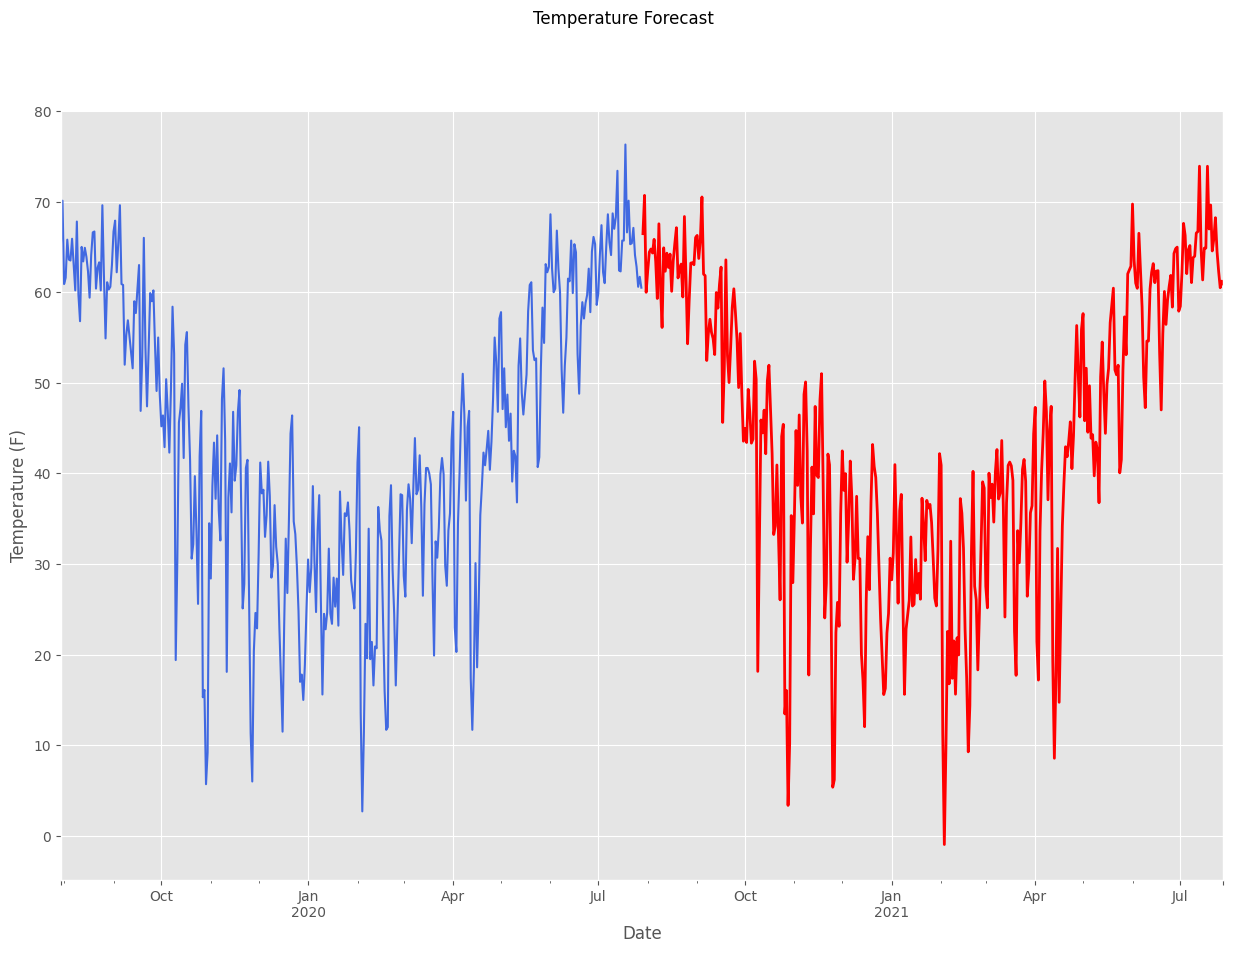

In [ ]:
forecastTemp = fitModelPredTemp.forecast(steps = len(weatherNoTemp), exog = weatherNoTemp.values) #Predict the next year's temps
ax = forecastTemp.plot(subplots = True, color = "red", linewidth = 2, title = "Temperature Forecast") #Plot the temp forecast
tempShort.plot(ax = ax, subplots = True, color = "royalblue") #Plot the temperature to the forecast
plt.ylabel("Temperature (F)") #Put the temperature label

In [ ]:
print("Actual (Taken from the source): 38.2") #Print yesterday's actual temperature
print("Prediction: {}".format(forecastTemp["2020-11-13"])) #Print yesterday's prediction

Actual (Taken from the source): 38.2
Prediction: 35.534834069970486


####Conclusion

The predictions seem pretty accurate based on previous years. The dewpoint prediction for yesterday was off, but it was more akin to dewpoints of previous years. Yesterday's average temperature was well predicted.

The missing data issues did not seem to cause any problems with prediction. The vast volume of data likely negated these sections of filled in data.

Example 2:

This dataset contains weather data collected in the city of Delhi from the period of 4 years (from 2013 to 2017). It can be used for the purpose of training. This is purely academic dataset and is developed as a part of Data Analytics course of 2019 at PES University, Bangalore.

**The dataset contains:**

**Training Dataset (DailyDelhiClimateTrain.csv)**

* **date:** The date on which the climate measurements were recorded.

* **meantemp:** The average temperature for that day.

* **humidity:** The average humidity level for the day, presumably measured as a percentage.

* **wind_speed:** The average wind speed for the day, likely measured in kilometers per hour or miles per hour.

* **meanpressure:** The average atmospheric pressure for the day, likely measured in millibars or inches of mercury.

**Test Dataset (DailyDelhiClimateTest.csv)**

The columns in the test dataset are the same as those in the training dataset:

* **date:** The date of climate data recording.

* **meantemp:** Average daily temperature.

* **humidity:** Average daily humidity level.

* **wind_speed:** Average daily wind speed.

* **meanpressure:** Average daily atmospheric pressure.

####Importing all the required packages

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

####Loading the datasets into the dataframe

In [ ]:
file_path1 = 'https://raw.githubusercontent.com/Amrutha1103/causality/main/DailyDelhiClimateTest.csv'  # Change this to the path of your first file
file_path2 = 'https://raw.githubusercontent.com/Amrutha1103/causality/main/DailyDelhiClimateTrain.csv'

import pandas as pd

data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)


####Data Visualization

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Amrutha1103/causality/main/DailyDelhiClimateTrain.csv")
df.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

####Checking the null values in the data

In [ ]:
print("Numer of missin values in our temperature column: ", df.meantemp.isnull().sum())

Numer of missin values in our temperature column:  0


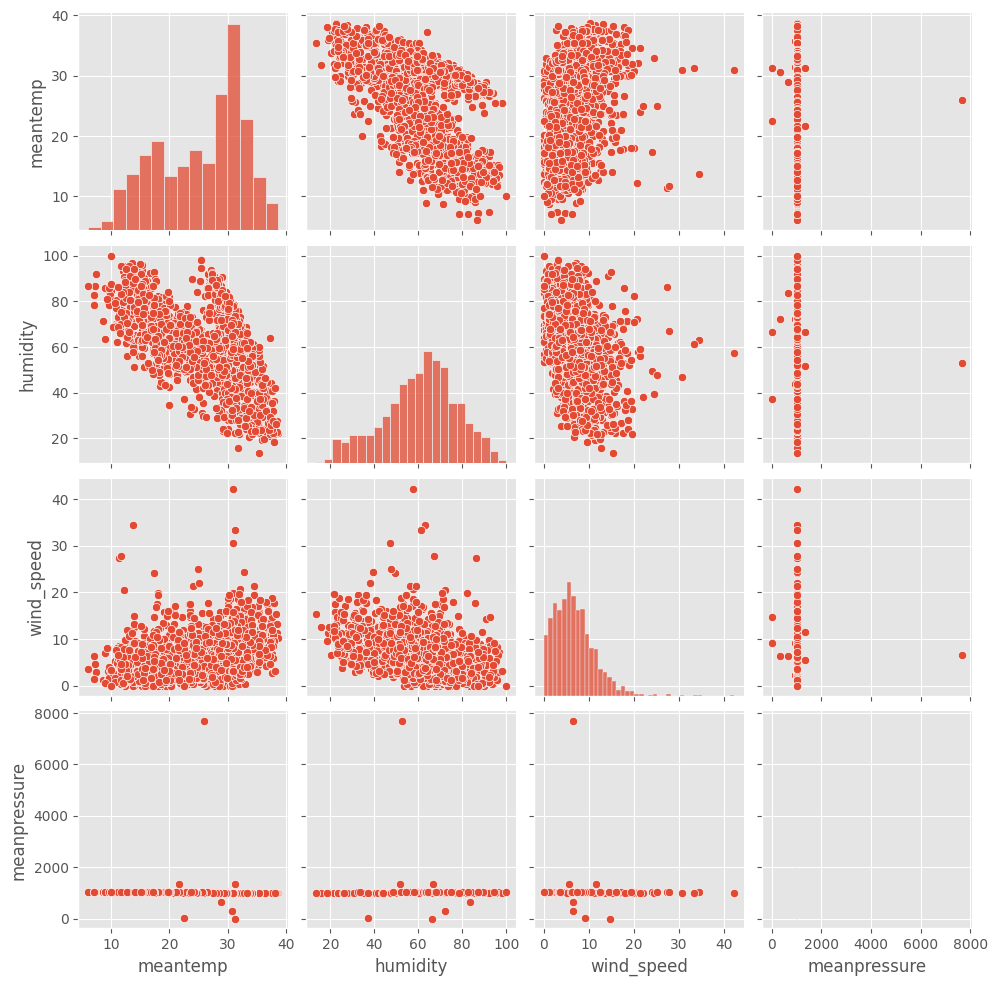

In [ ]:
sns.pairplot(df)

 This pairplot visualizes the pairwise relationships between the variables in the dataset, as well as the distributions of each variable along the diagonal.

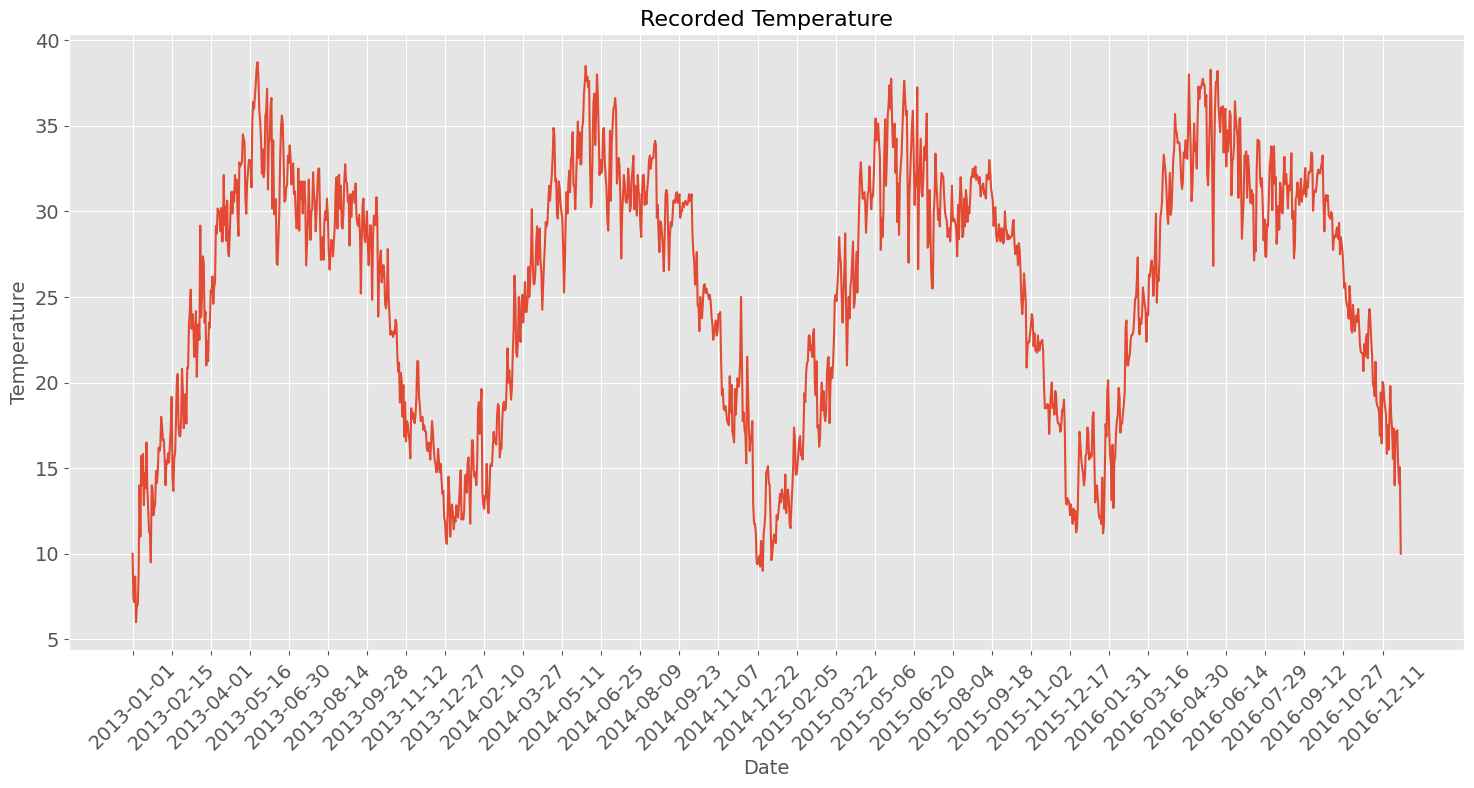

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(df.date, df['meantemp'])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature", fontsize=16)
plt.show()

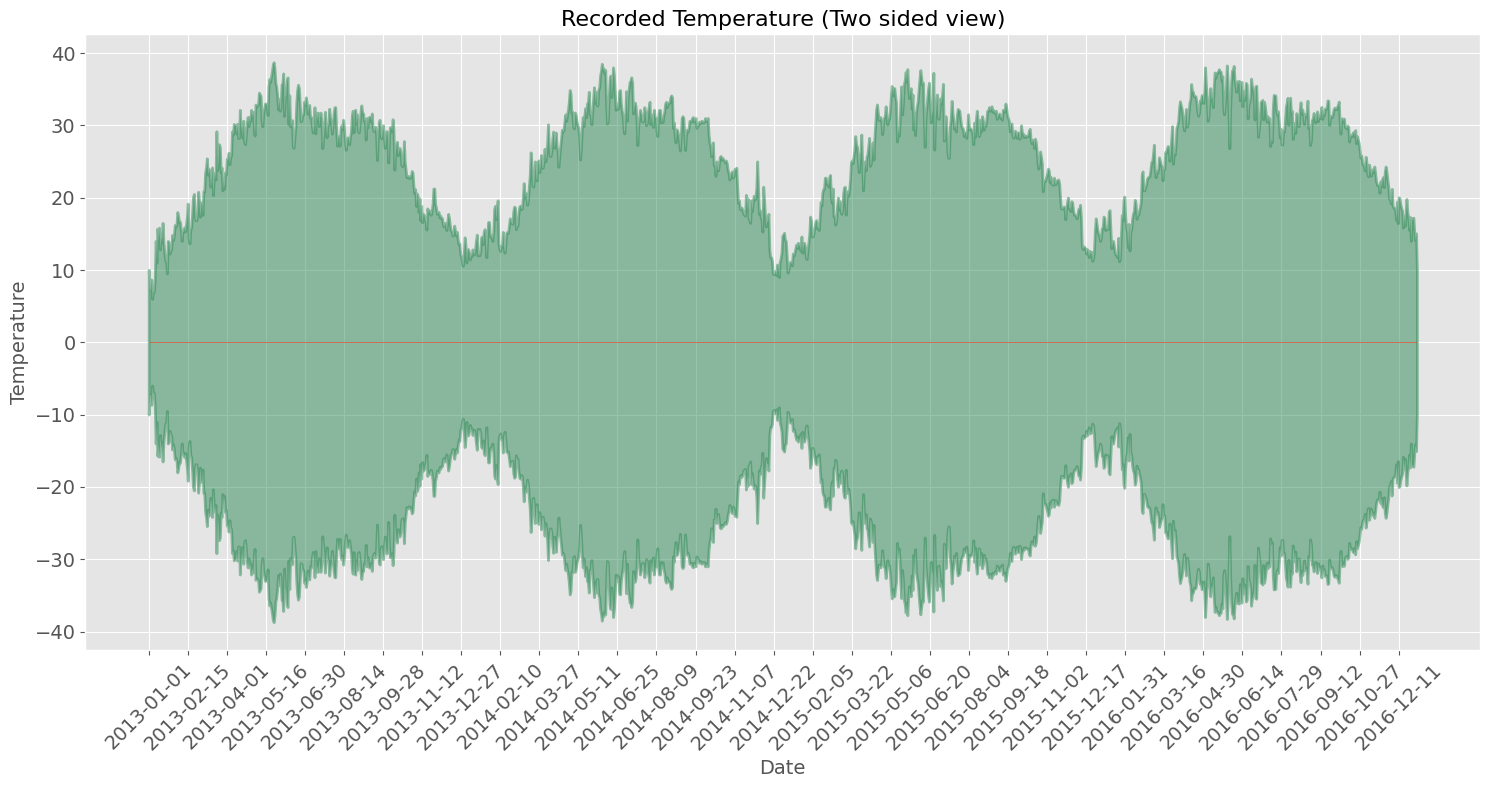

In [ ]:
plt.figure(figsize=(18, 8))
plt.fill_between(df.date, y1=df['meantemp'], y2=-df['meantemp'], alpha=0.5, linewidth=2, color='seagreen')
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature (Two sided view)", fontsize=16)
plt.show()

 #### Below code is creating a line plot to compare the temperature trends across different years in the dataset. Each line in the plot represents the temperature trend for a different year, allowing for a visual comparison of yearly patterns

Temperature Years on Record:  2013 2014 2015 2016


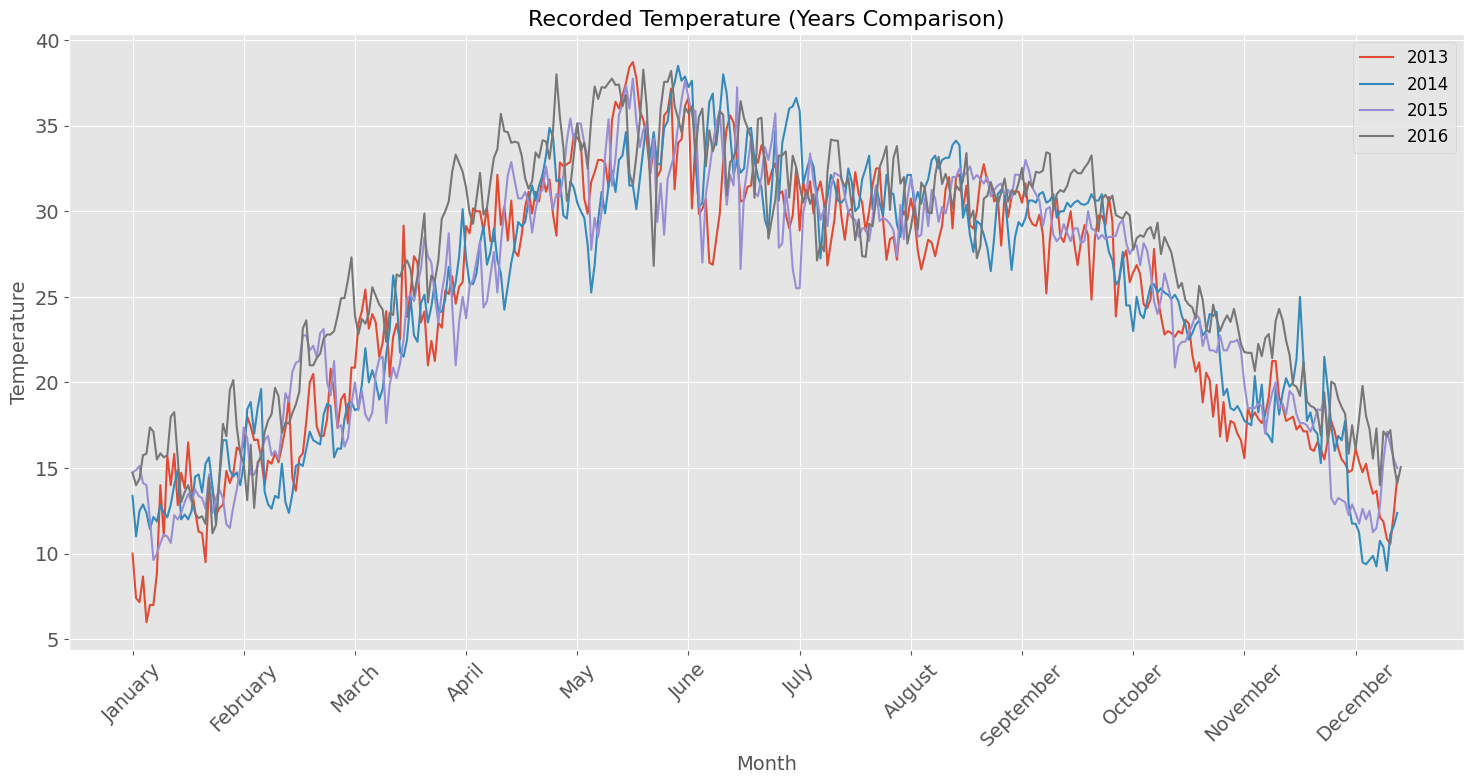

In [ ]:
plt.figure(figsize=(18, 8))
dates = pd.to_datetime(df.date.iloc[:-1])
print("Temperature Years on Record: ", *dates.dt.year.unique())
for i in dates.dt.year.unique():
    plt.plot(df['meantemp'].iloc[:-1][dates.dt.year==i].values, label=i)

plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 365, 32), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature (Years Comparison)", fontsize=16)
plt.legend(fontsize=12)
plt.show()

#### Below boxplot allows for an easy comparison of temperature distributions across different years, highlighting variations and trends over time

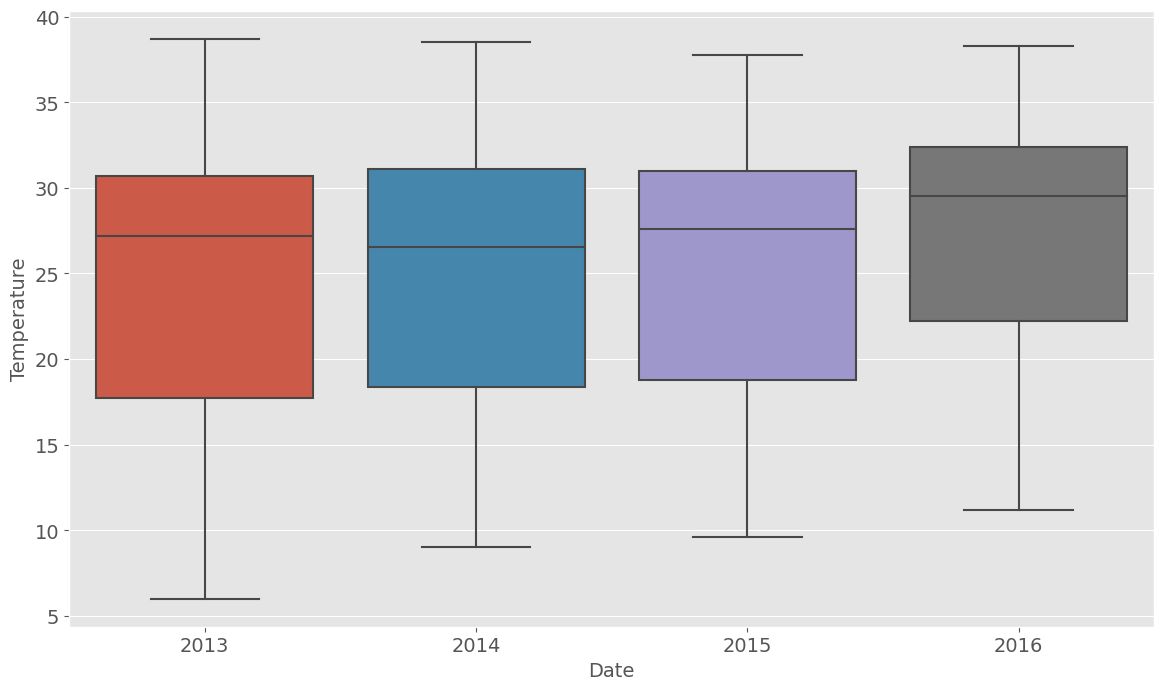

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=dates.dt.year.iloc[:-1], y='meantemp', data=df.iloc[:-1])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Below boxplot that shows the distribution of mean temperatures ('meantemp') for each month, highlighting aspects like the median, quartiles, and potential outliers in temperature data for each month.

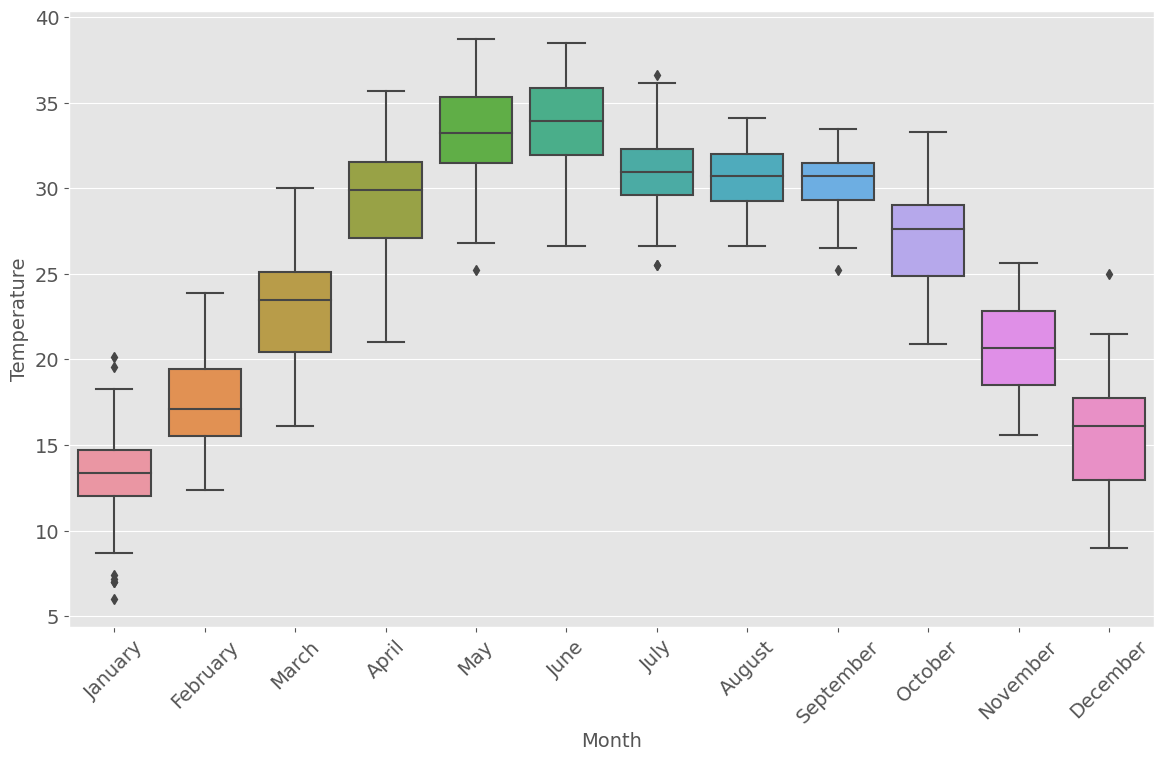

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=dates.dt.month.iloc[:-1], y='meantemp', data=df.iloc[:-1])
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 12), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###Time series Decomposition

###Multiplicative Decomposition

This technique is used to decompose a time series into three components: trend, seasonal, and residual (or irregular) components. However, unlike additive decomposition, multiplicative decomposition assumes that these components multiply together to produce the original time series.


* The key difference between multiplicative and additive decomposition is in how the components interact. In an additive model, these components are summed together, while in a multiplicative model, they are multiplied. This makes multiplicative models more suitable for series where the amplitude of the seasonal pattern or the variability around the trend increases as the level of the time series increases.

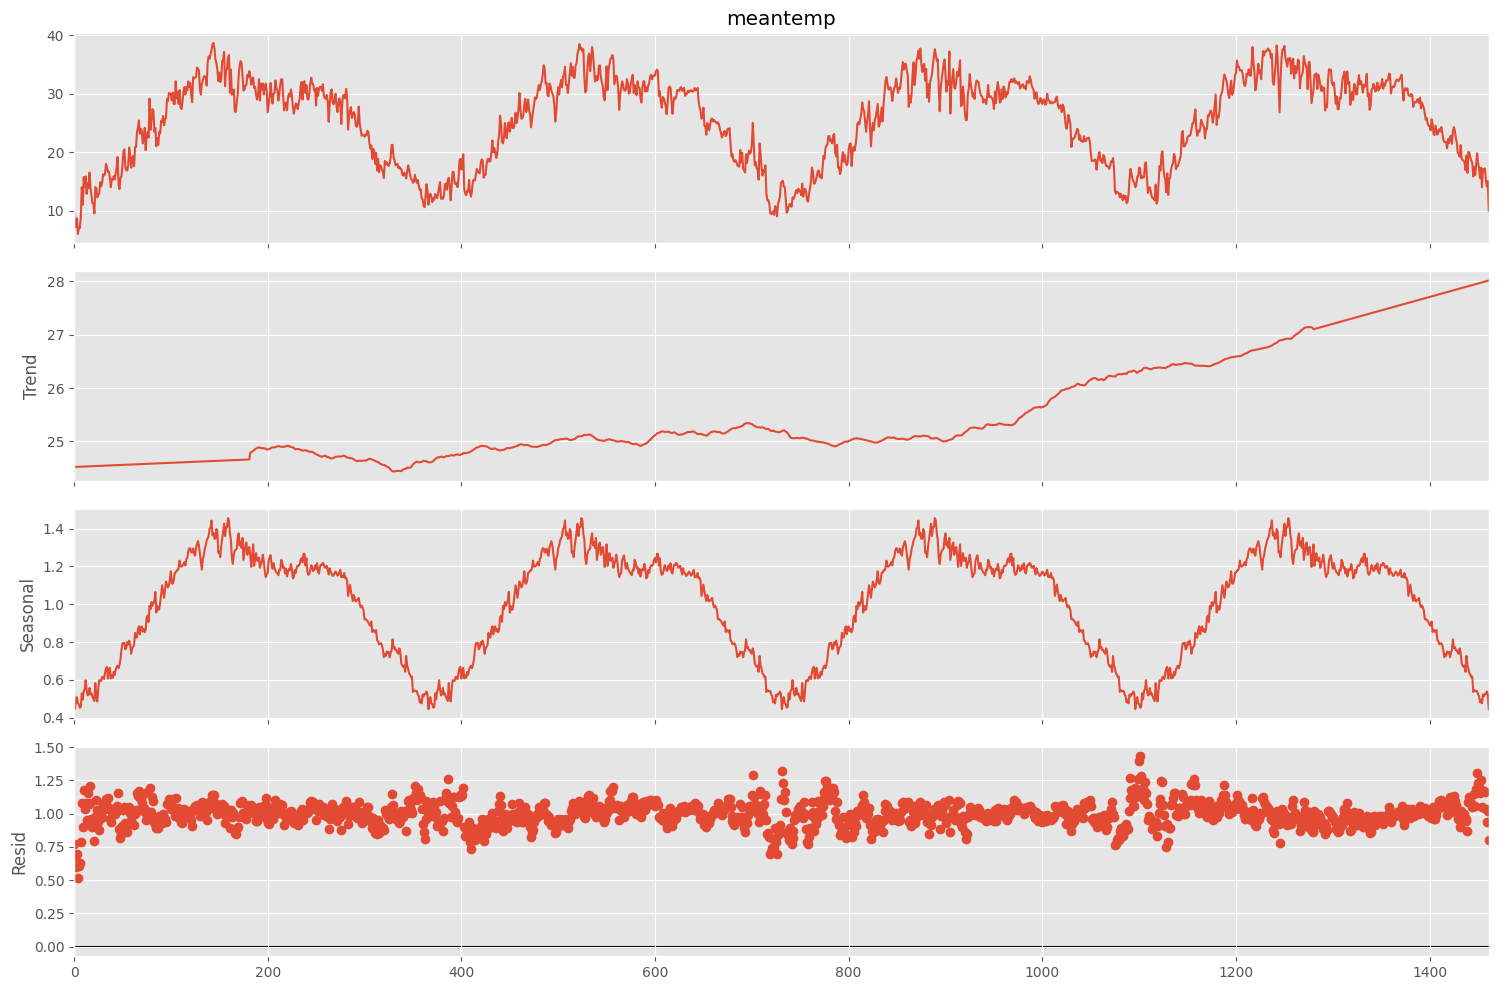

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition
decomp_mul = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
decomp_mul.plot()
plt.show()

####Additive Decomposition

This method is applied to decompose a time series into three distinct components: trend, seasonal, and residual. The key characteristic of additive decomposition is the assumption that these components are added together to form the original time series.

* Additive decomposition is particularly useful when the seasonal variations are relatively constant over time, regardless of the level of the time series. This is in contrast to multiplicative decomposition, where the seasonal variations are proportional to the level of the time series.

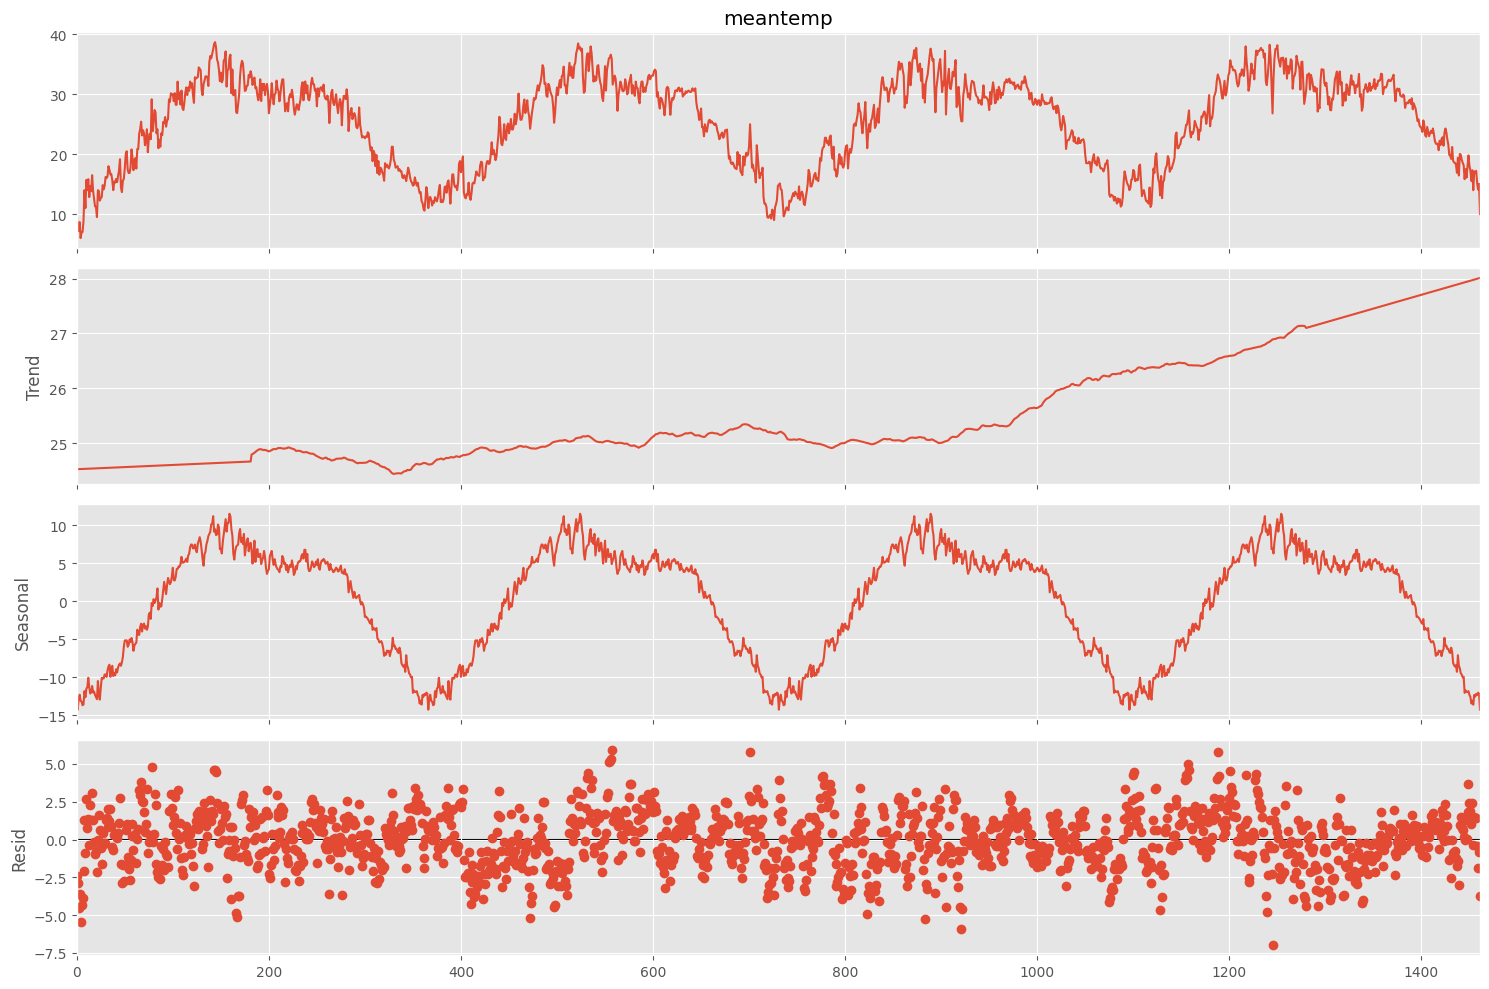

In [ ]:
# Additive Decomposition
decomp_add = seasonal_decompose(df['meantemp'], model='additive', extrapolate_trend='freq', period=365)
decomp_add.plot()
plt.show()

###Test for stationarity and trend stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey Fuller (ADF) Test
result = adfuller(df['meantemp'].values, autolag='AIC')
print('ADF Statistic:', result[0], 'p-value:', result[1])

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
result = kpss(df['meantemp'].values, nlags="auto", regression='c')
print('KPSS Statistic: ', result[0], 'p-value: ', result[1])

ADF Statistic: -2.0210690559206737 p-value: 0.2774121372301601
KPSS Statistic:  0.18786352260533618 p-value:  0.1


###Detrending a time-series

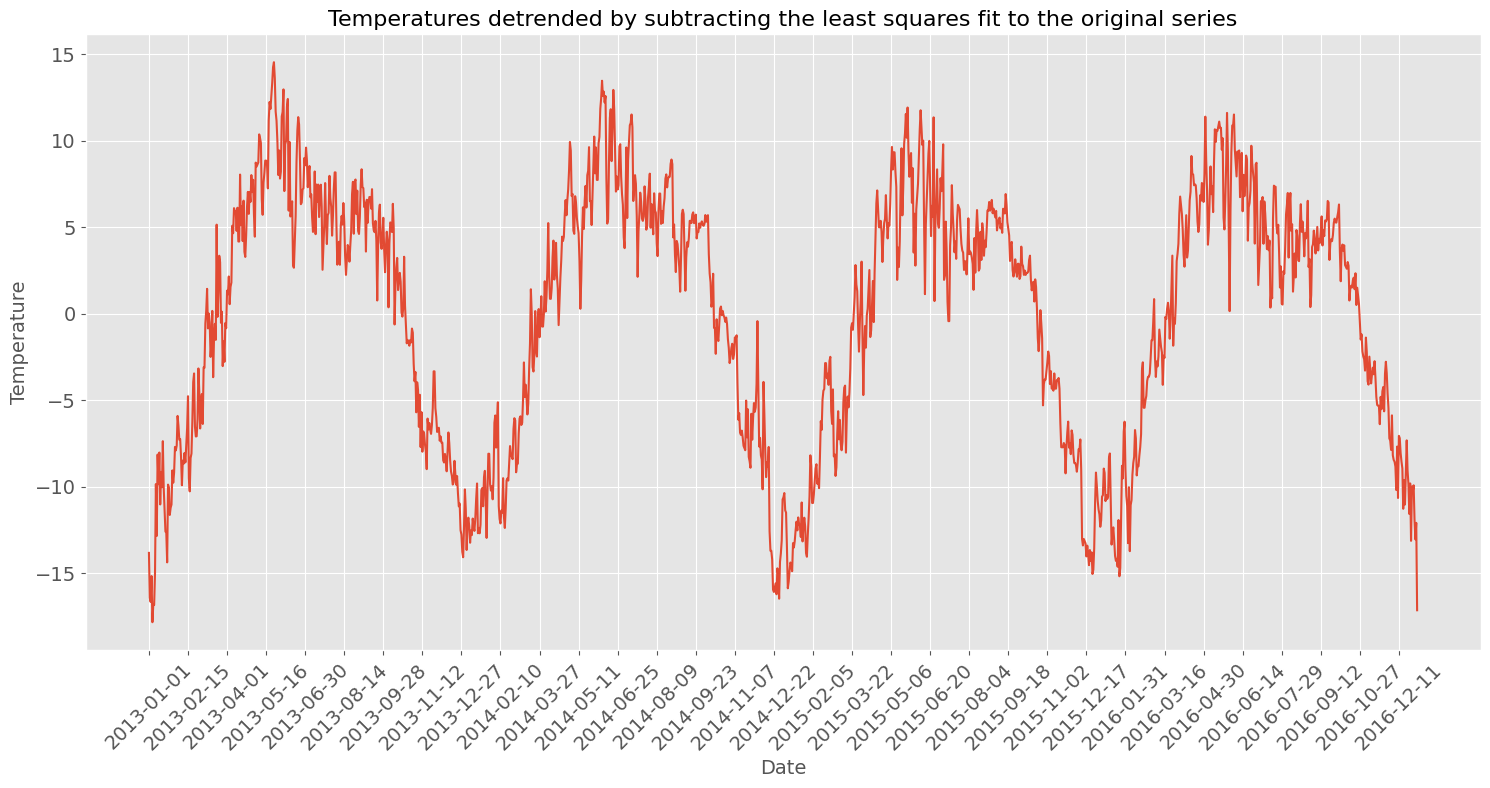

In [ ]:
from scipy import signal

plt.figure(figsize=(18, 8))
detrended = signal.detrend(df['meantemp'].values)
plt.plot(df.date, detrended)
plt.title('Temperatures detrended by subtracting the least squares fit to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

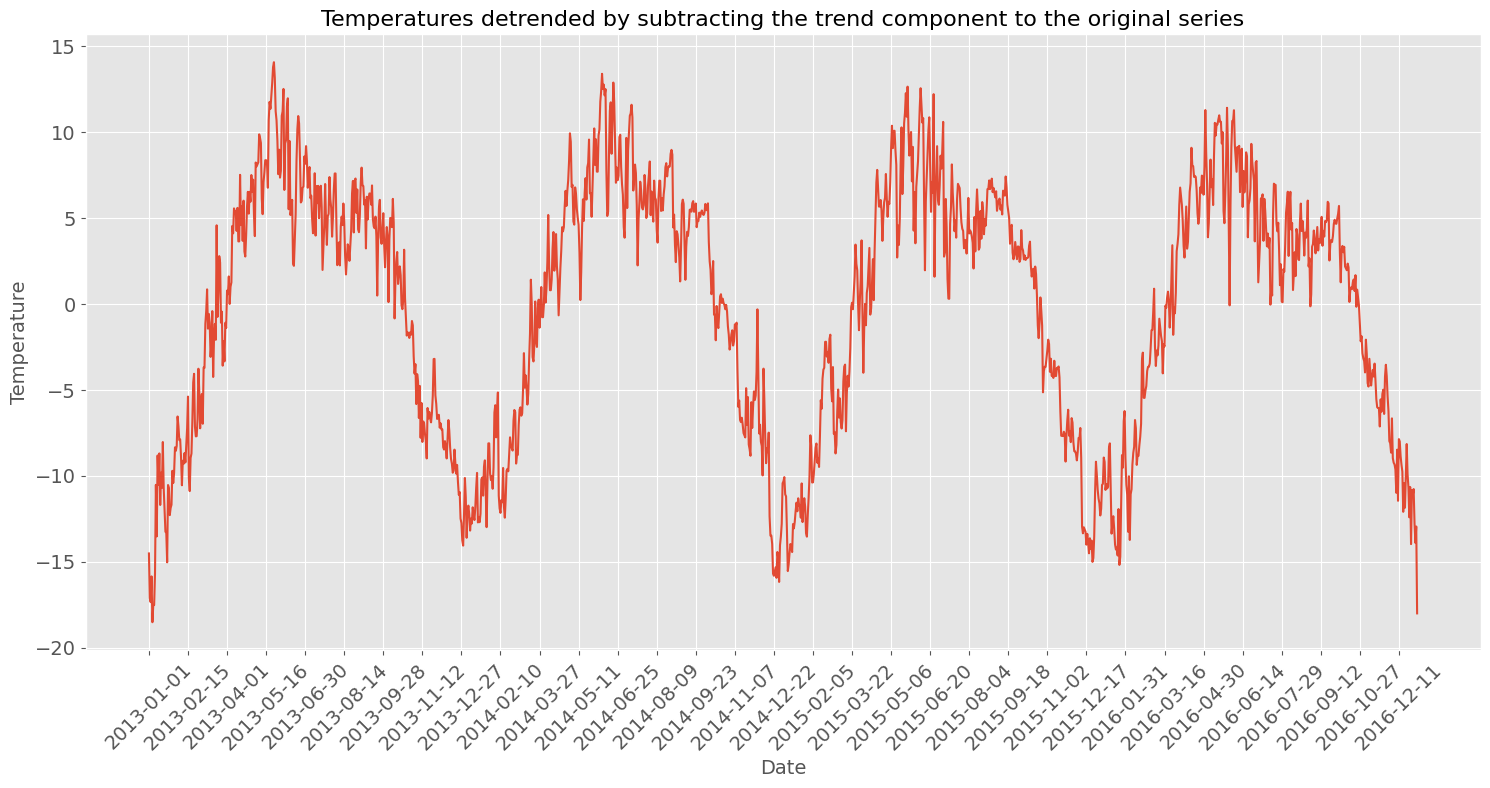

In [ ]:
plt.figure(figsize=(18, 8))
decomp_mul = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
detrended = df['meantemp'].values - decomp_mul.trend
plt.plot(df.date, detrended)
plt.title('Temperatures detrended by subtracting the trend component to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###Deseasonalizing a time series

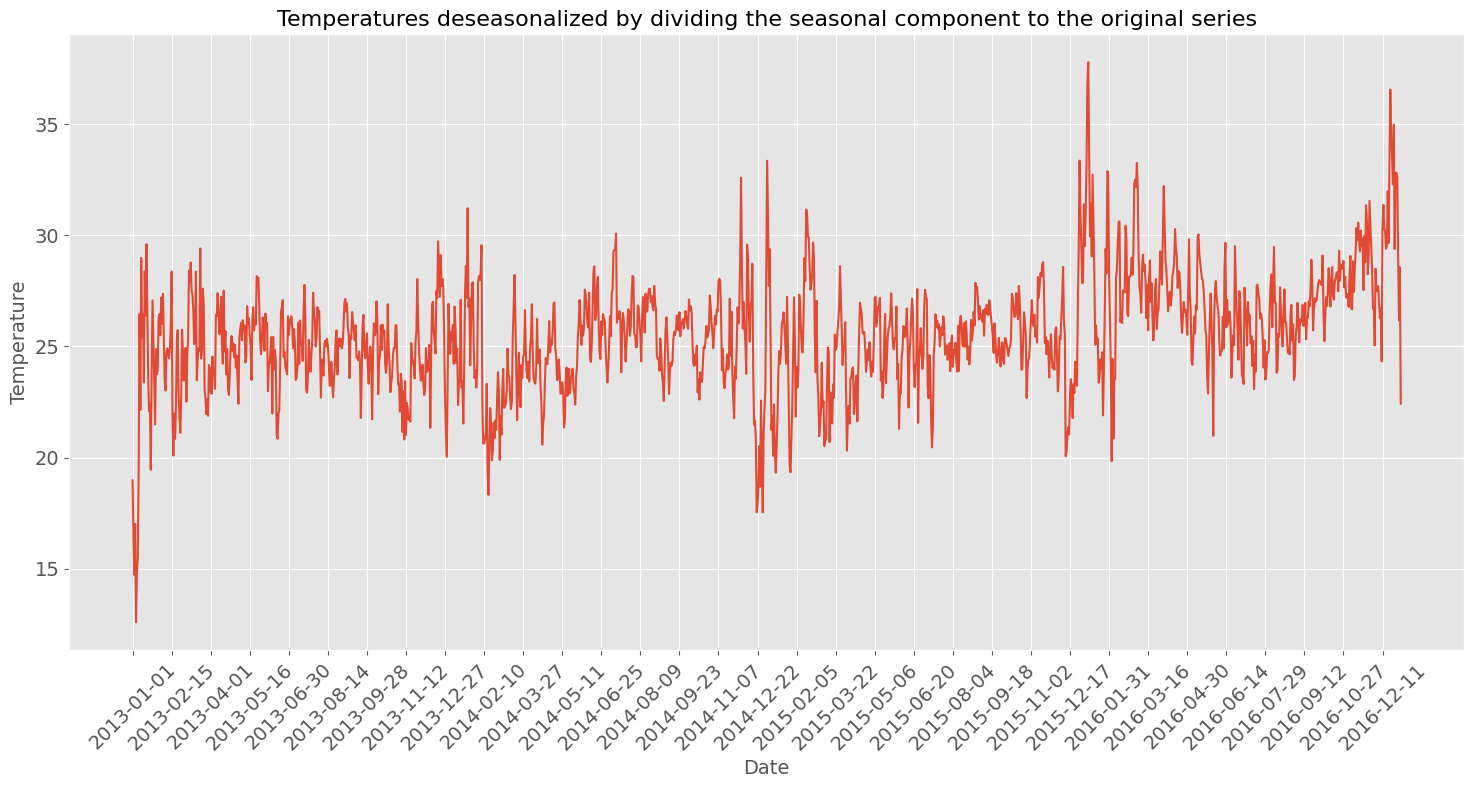

In [ ]:
plt.figure(figsize=(18, 8))
deseasonalized = df['meantemp'].values / decomp_mul.seasonal
plt.plot(df.date, deseasonalized)
plt.title('Temperatures deseasonalized by dividing the seasonal component to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###Testing for time-series seasonality

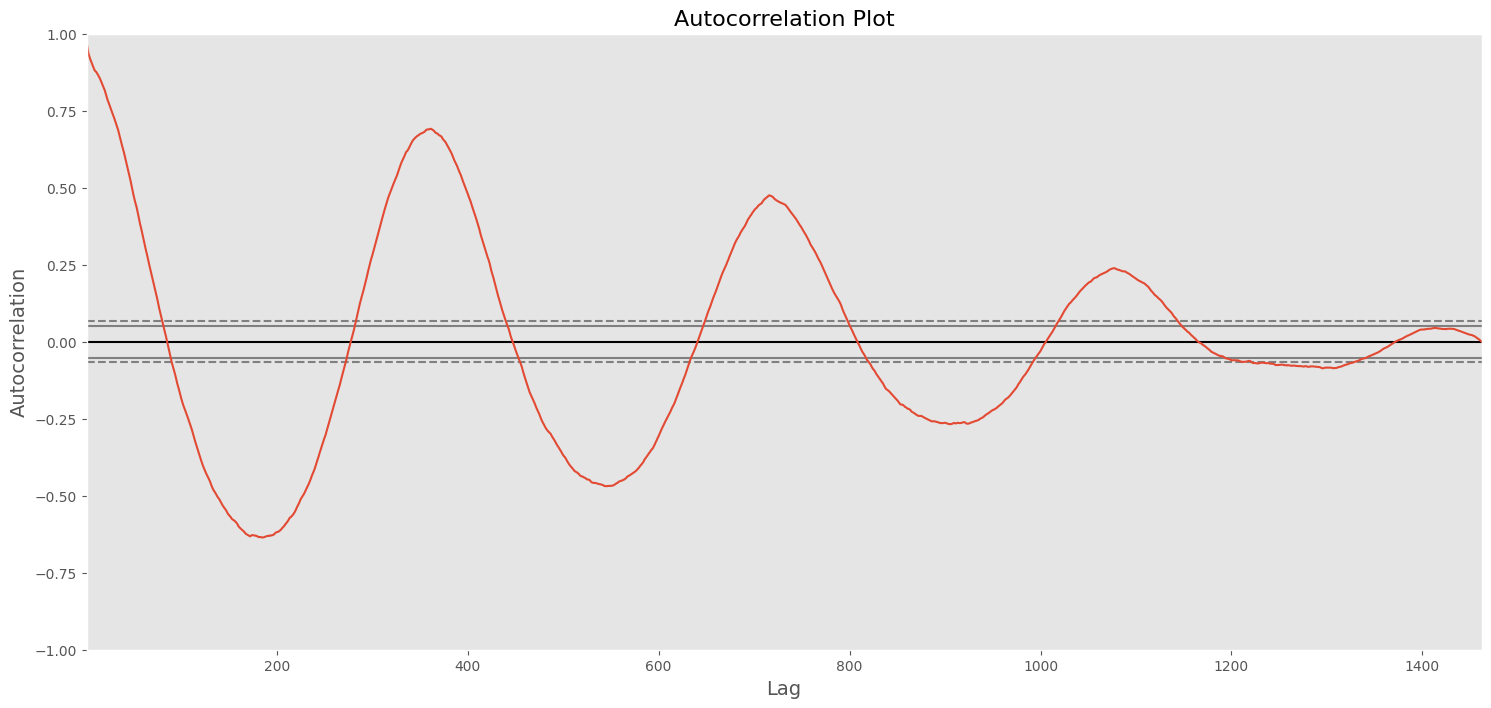

In [ ]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(18, 8))
autocorrelation_plot(df['meantemp'])
plt.title('Autocorrelation Plot', fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.show()

###Autocorrelation and Partial-autocorrelation

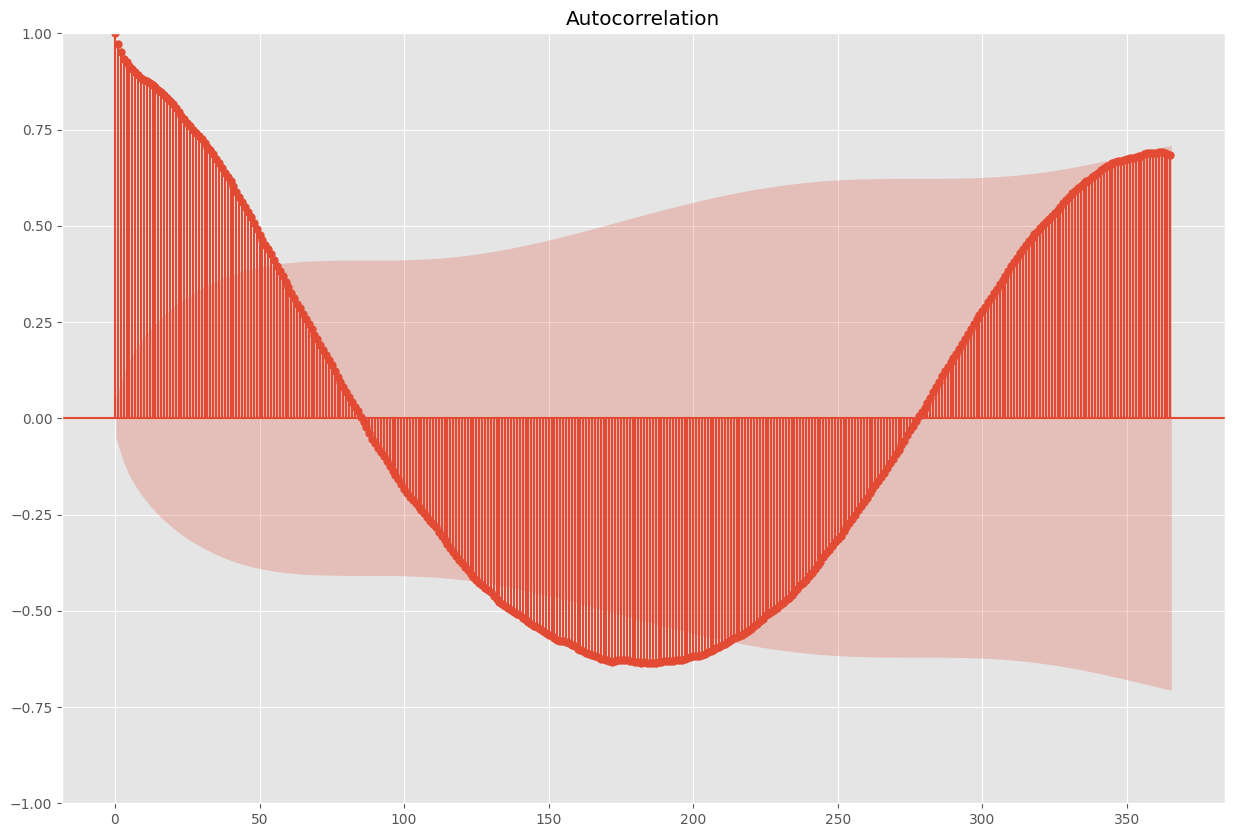

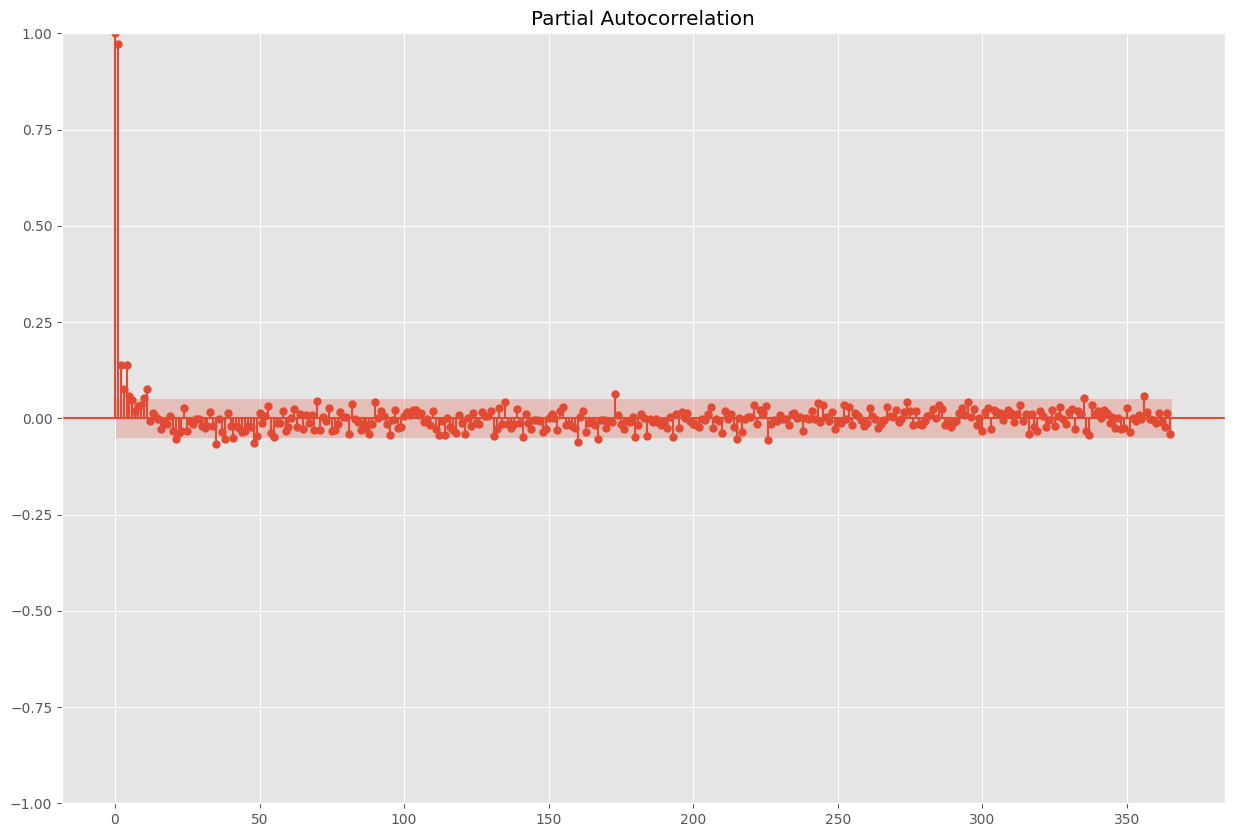

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['meantemp'], lags=365)
plt.show()
plot_pacf(df['meantemp'], lags=365)
plt.show()

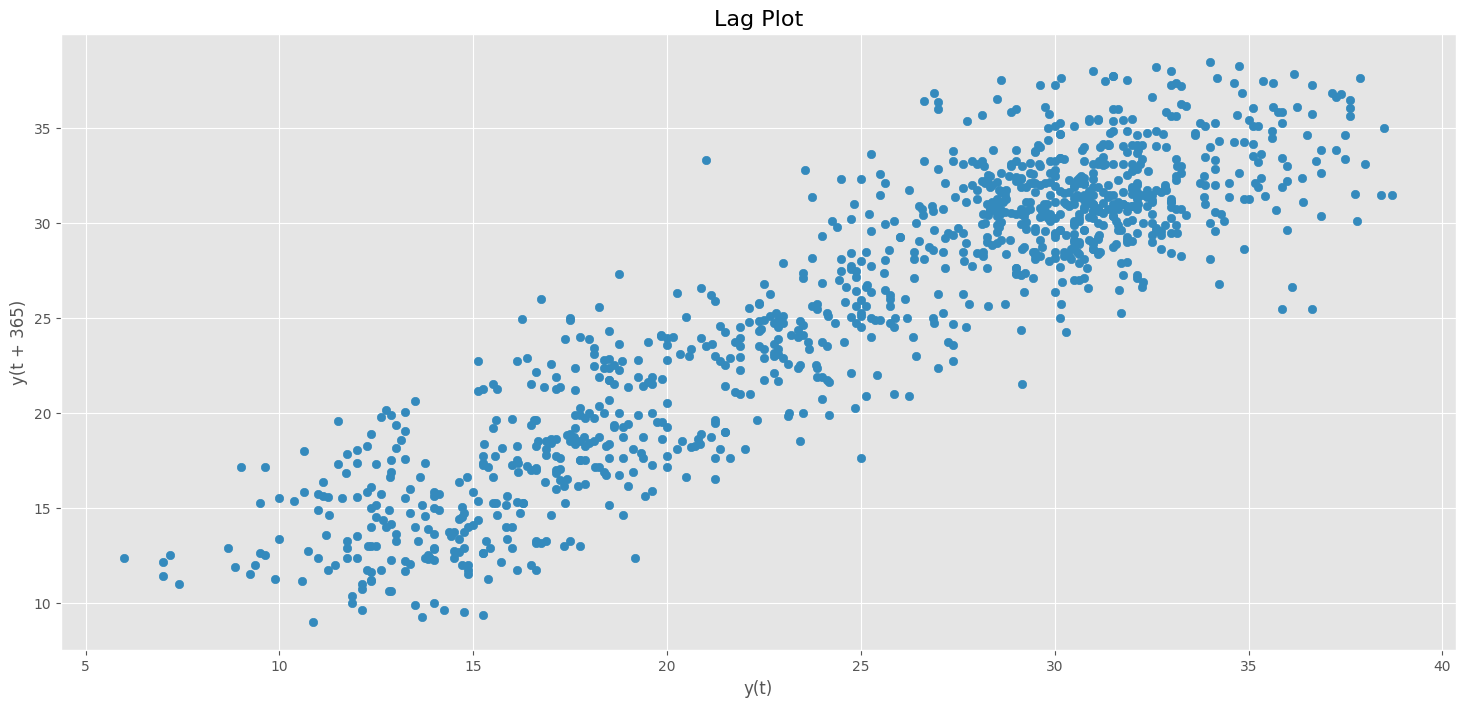

In [ ]:
#Lag plot

from pandas.plotting import lag_plot

plt.figure(figsize=(18, 8))
lag_plot(df['meantemp'], lag=365)
plt.title('Lag Plot', fontsize=16)
plt.show()

######Smoothing a time-series

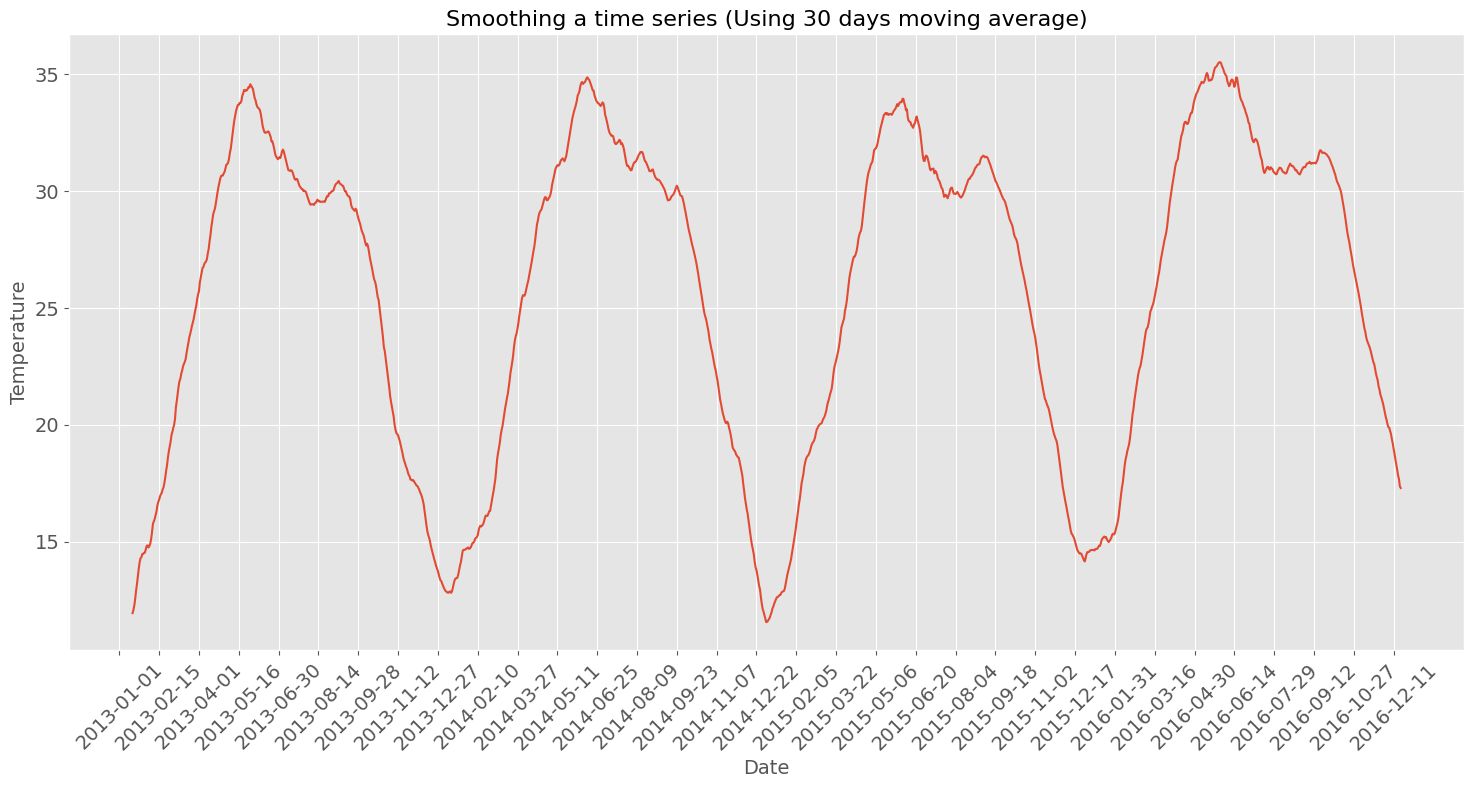

In [ ]:


plt.figure(figsize=(18, 8))
df_ma = df['meantemp'].rolling(30, center=True, closed='both').mean()
plt.plot(df.date, df_ma)
plt.title('Smoothing a time series (Using 30 days moving average)', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# LOWESS smoothing (Locally Weighted Regression)
df_loess = pd.DataFrame(lowess(df['meantemp'], np.arange(len(df['meantemp'])), frac=0.10)[:, 1], index=df.date, columns=['meantemp'])
df_loess.head()

meantemp
date                
2013-01-01  9.021920
2013-01-02  9.206480
2013-01-03  9.391054
2013-01-04  9.575645
2013-01-05  9.760254

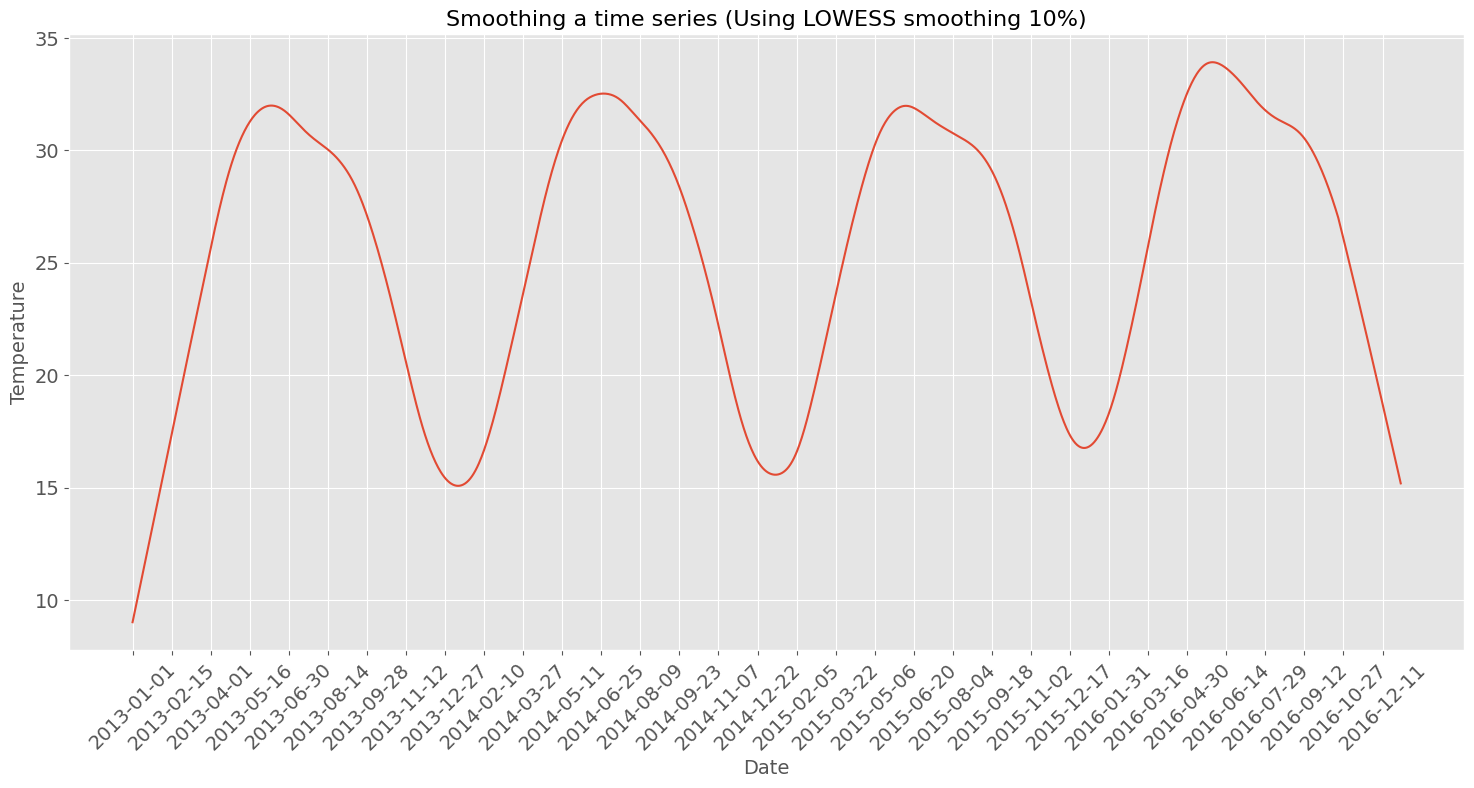

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(df_loess.index, df_loess['meantemp'])
plt.title('Smoothing a time series (Using LOWESS smoothing 10%)', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####Granger Causality test
Understanding if one time series will be useful to forecast another.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df[['meantemp', 'humidity']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3483  , p=0.0039  , df_denom=1458, df_num=1
ssr based chi2 test:   chi2=8.3655  , p=0.0038  , df=1
likelihood ratio test: chi2=8.3416  , p=0.0039  , df=1
parameter F test:         F=8.3483  , p=0.0039  , df_denom=1458, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7585  , p=0.0637  , df_denom=1455, df_num=2
ssr based chi2 test:   chi2=5.5360  , p=0.0628  , df=2
likelihood ratio test: chi2=5.5255  , p=0.0631  , df=2
parameter F test:         F=2.7585  , p=0.0637  , df_denom=1455, df_num=2


{1: ({'ssr_ftest': (8.348287242759334, 0.003917586510546236, 1458.0, 1),
   'ssr_chi2test': (8.365464788526328, 0.0038241879867707707, 1),
   'lrtest': (8.341606126880833, 0.003874732859744176, 1),
   'params_ftest': (8.348287242759076, 0.003917586510546435, 1458.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.7585146949624835, 0.06371737139415601, 1455.0, 2),
   'ssr_chi2test': (5.535988253807871, 0.06278782291707086, 2),
   'lrtest': (5.5255191051082875, 0.06311735216461932, 2),
   'params_ftest': (2.7585146949627695, 0.06371737139413886, 1455.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [ ]:
#ARIMA (Auto Regressive Integrated Moving Average)
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['meantemp'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1462
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2768.239
Date:                Wed, 06 Dec 2023   AIC                           5542.478
Time:                        20:57:37   BIC                           5558.339
Sample:                             0   HQIC                          5548.395
                               - 1462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5728      0.046     12.494      0.000       0.483       0.663
ma.L1         -0.8028      0.036    -22.070      0.000      -0.874      -0.731
sigma2         2.5896      0.072     36.204      0.0

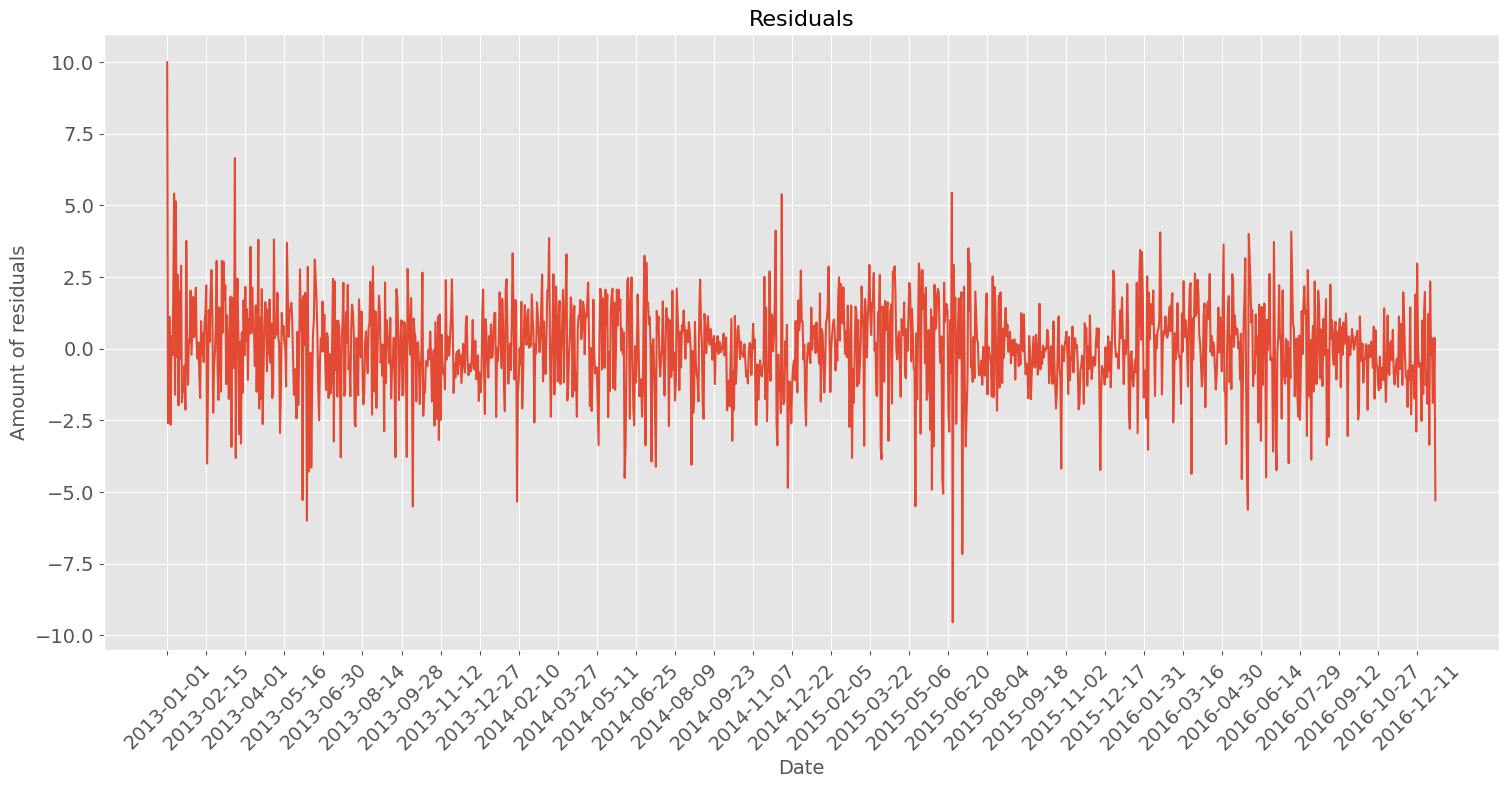

In [ ]:
# Plotting residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(18, 8))
plt.plot(residuals)
plt.title('Residuals', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Amount of residuals", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), labels=[df.date[i] for i in range(0, len(df.date)+1, 45)], rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<Figure size 1800x800 with 0 Axes>

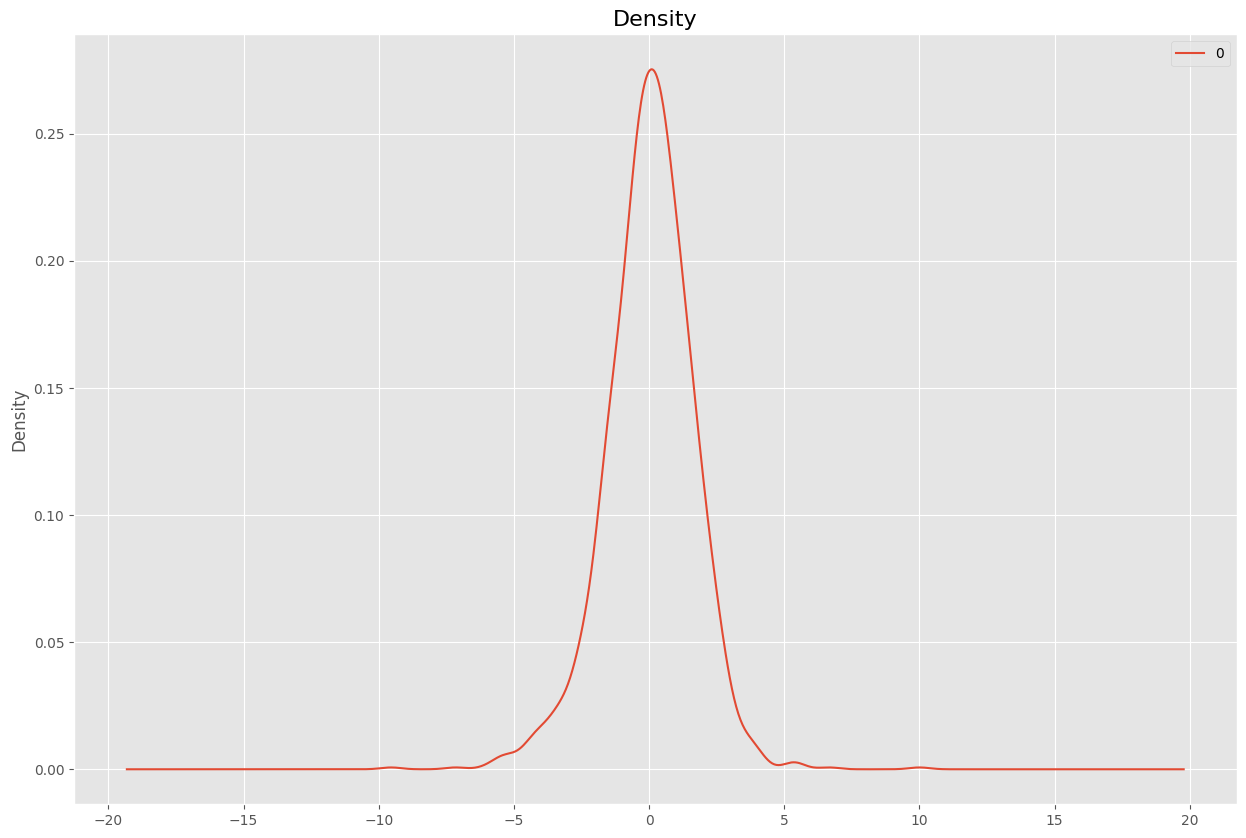

In [ ]:
plt.figure(figsize=(18, 8))
residuals.plot(kind='kde', title='Density')
plt.title('Density', fontsize=16)
plt.show()

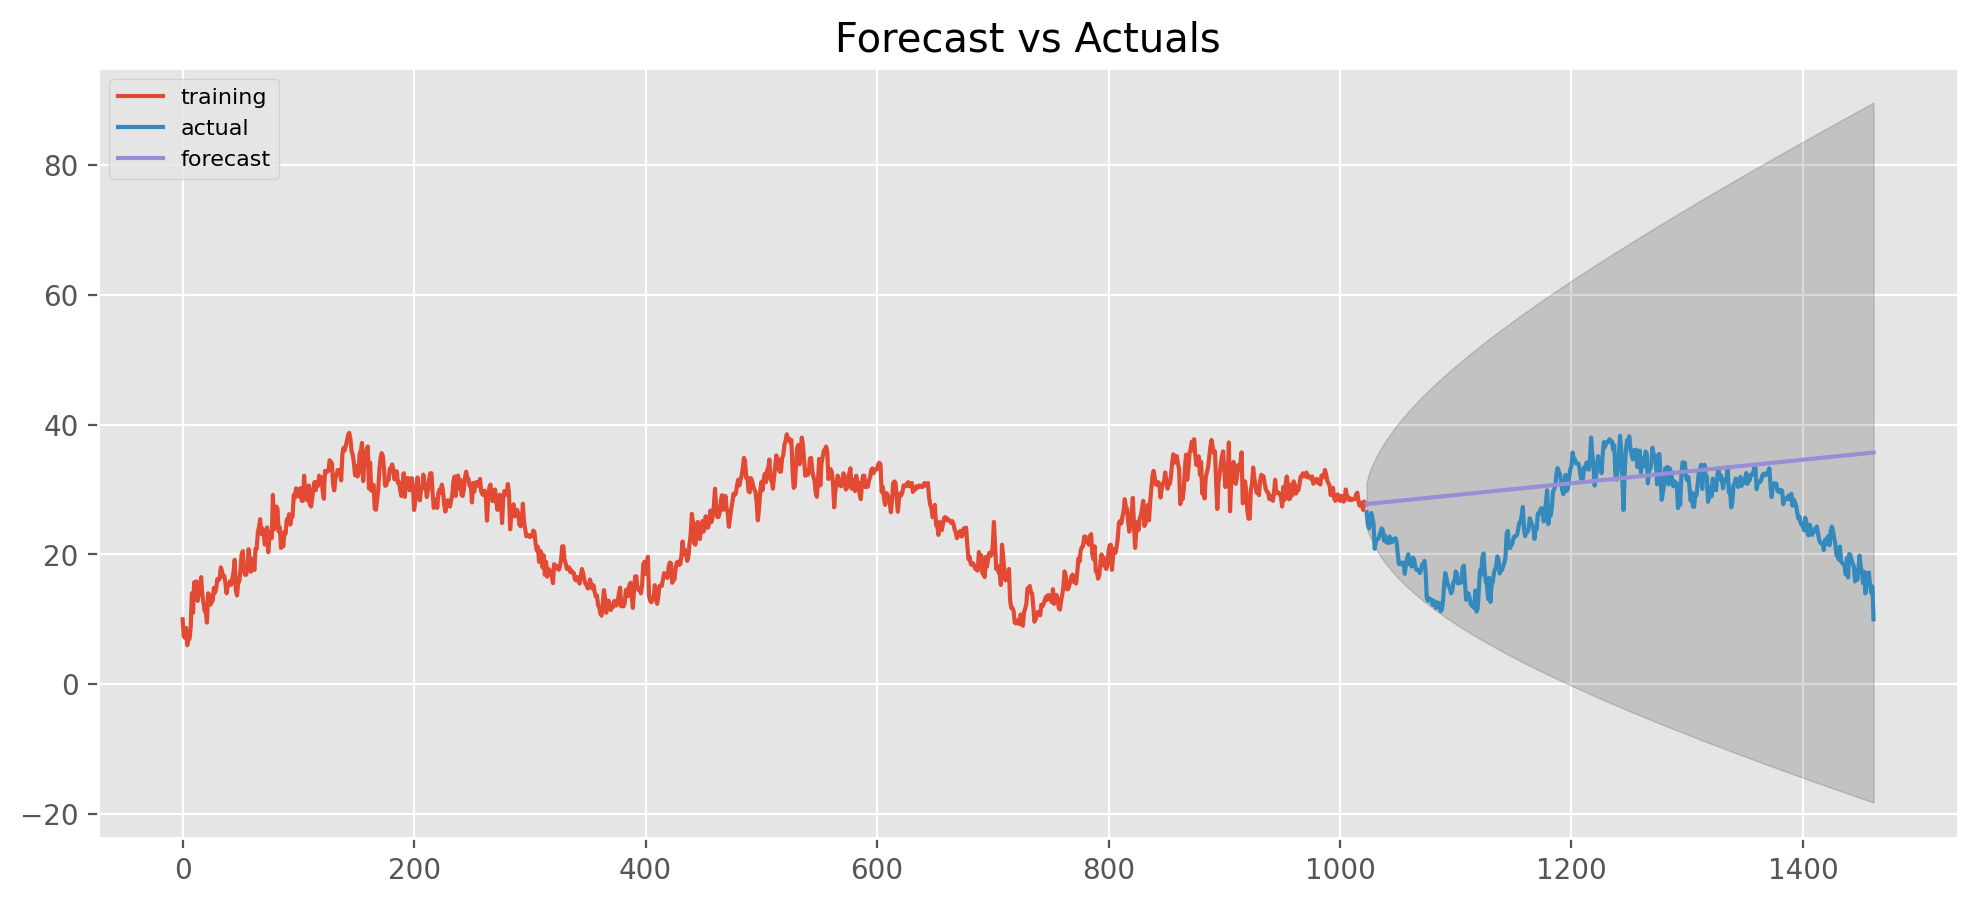

In [ ]:
train = df['meantemp'][:int(np.floor((len(df)/100)*70))]
test = df['meantemp'][int(np.floor((len(df)/100)*70)):]

model = ARIMA(train, order=(3, 2, 1))
fitted = model.fit()

fc = fitted.get_forecast(len(df['meantemp'][int(np.floor((len(df)/100)*70)):]))
conf = fc.conf_int(alpha=0.05) # 95% confidence

fc_series = pd.Series(fc.predicted_mean, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=200)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

###**License:**

Copyright (c) 2023 Amrutha Sai Edara


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE





###**References:**

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/f-test/

https://towardsdatascience.com/causal-discovery-6858f9af6dcb

https://medium.com/@hosamedwee/causal-inference-1-the-essence-of-causality-d684f7885000

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1239917/#:~:text=In%20the%20counterfactual%20model%2C%20a,multiple%20causal%20factors%20are%20allowed.